<h1 align="center"><font size="10"><strong>FINAL PROJECT 3: Ensemble</strong></font></h1>
<h2 align="center"><font size="7">Data Heart Failure Prediction</font></h2>

# 1. Introduction

## 1.1 Goup 7:
```
1. Nama: Novita Nurul Hidayati
     ID: PYTN-KS20-021
2. Nama: Javier Al Faiza
     ID: PYTN-KS-013
3. Nama: Leticia
     ID: PYTN-KS20-023

## 1.2 Latar Belakang
Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor satu di seluruh dunia, menewaskan sekitar 17,9 juta orang setiap tahunnya, yang menyumbang 31% dari semua kematian di dunia. Gagal Jantung adalah peristiwa umum yang disebabkan oleh CVD.
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko seperti penggunaan tembakau, diet yang tidak sehat, diabetes, inaktivitas fisik, dan penggunaan alkohol berbahaya dengan menggunakan strategi di seluruh populasi.
Orang-orang dengan penyakiti kardiovaskular atau yang berisiko tinggi kardiovaskular (karena adanya satu atau lebih faktor risiko seperti, hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) membutuhkan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.

## 1.3 Dataset
Dataset ini diambil dari website Kaggle <a href="www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data" title="Data Heart Failure Prediction">Data Heart Failure Prediction</a>. 
Dataset ini memiliki 13 atribut/variabel yang berisi mengenai prediksi keselamatan pasien dari penyakit jantung. Variabel-variabel tersebut antara lain:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
    * 0 = Tidak
    * 1 = Ya
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
    * 0 = Tidak
    * 1 = Ya
5. ejection_fraction - presentase daerah yang meninggalkan jantung dalam presentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien mempunyai darah tinggi
    * 0 = Tidak
    * 1 = Ya
7. platelets - jumlah platelet di dalam darah, dengan satuan kiloplatelets/mL
8. serum_creatinine - level serum kreatinin di dalam darah, dengan satuan mg/dL
9. serum_sodium - level serum sodium di dalam darah, dengan satuan mEq/L
10. sex - jenis kelamin pasien
    * 0 = Perempuan
    * 1 = Laki-laki
11. smoking - apakah pasien merokok
    * 0 = Tidak
    * 1 = Ya
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up
    * 0 = Tidak
    * 1 = Ya

## 1.4 Object yang ingin dicapai
Object yang ingin dicapai pada final project 3 melalui analisis ini adalah:
* Mengetahui faktor-faktor yang berpengaruh terhadap keselamatan pasien dari penyakit jantung
* Memprediksi keselamatan pasien dari penyakit jantung berdasarkan faktor-faktor yang mempengaruhinya menggunakan 6 metode (Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Naive Bayes, Decision Tree, dan Random Forest)
* Mengetahui model terbaik dari 6 model yang dibuat

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px
import scipy
from scipy.stats.mstats import winsorize
from sklearn import preprocessing
from sklearn import metrics

# Data exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
import missingno as msno

# Building model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

Dataset yang digunakan adalah ```heart_failure_clinical_records_datase.csv```

## 3.1 Memanggil Dataset

In [2]:
# Read Dataset
df = pd.read_csv("Dataset/heart_failure_clinical_records_dataset.csv")

# Menampilkan data
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Melihat 5 data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Melihat 5 data terbawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## 3.2 Melihat Jumlah Baris dan Kolom

In [5]:
# Menampilkan dimensi data
df.shape

(299, 13)

In [6]:
# Melihat semua feature dalam dataset
print(df.columns.values)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


Dataset ini memiliki ```13 kolom``` dan ```299 baris```

## 3.3 Melihat Info dan Type Data

In [7]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dataset di atas terdiri dari 3 type data ```float``` dan 10 type data ```integer```

## 3.4 Melihat Data Kategorik dan Numerik

In [8]:
# Mengecek kolom kategori
categorical = [col for col in df.columns if df[col].dtypes == '0']

print('Terdapat {} kolom kategori'.format(len(categorical)))
print('Kolom kategori', categorical)

Terdapat 0 kolom kategori
Kolom kategori []


In [9]:
# Mengecek kolom numerik
numerical = [col for col in df.columns if df[col].dtypes != '0']

print('Terdapat {} kolom numerik'.format(len(numerical)))
print('Kolom numerik', numerical)

Terdapat 13 kolom numerik
Kolom numerik ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


# 4. Data Cleaning

## 4.1 Mengecek Missing Value

In [10]:
# Menampilkan jumlah nilai null dalam data
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dataset ini tidak memiliki missing value yang artinya dataset ini bersih dari kekosongan nilai pada setiap barisnya

## 4.2 Mengecek Duplicate Data

In [11]:
# Menampilkan jumlah duplikat pada data
df.duplicated().sum()

0

Dataset ini tidak memiliki data duplikat

## 4.3 Melihat Outlier dan Distribusi Kolom Numerik

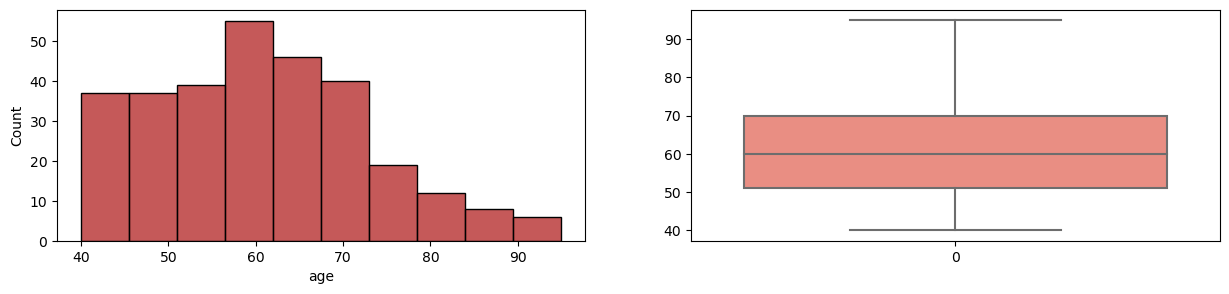

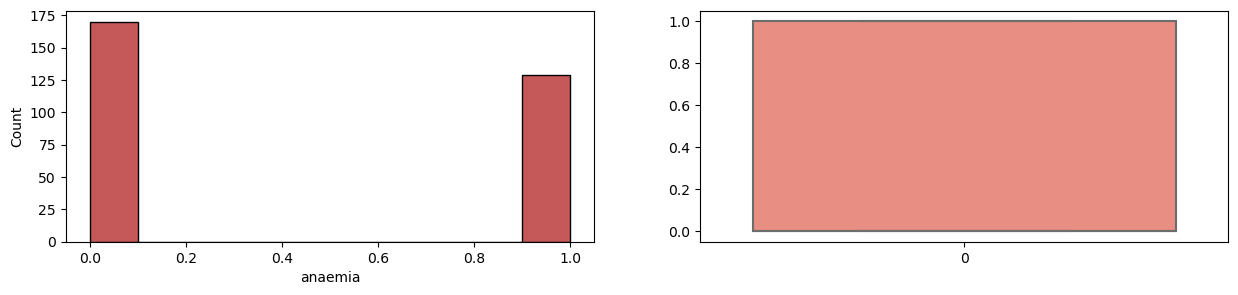

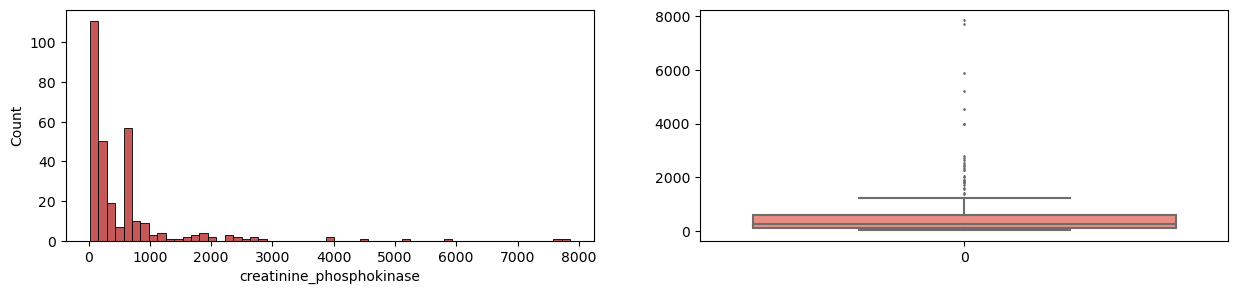

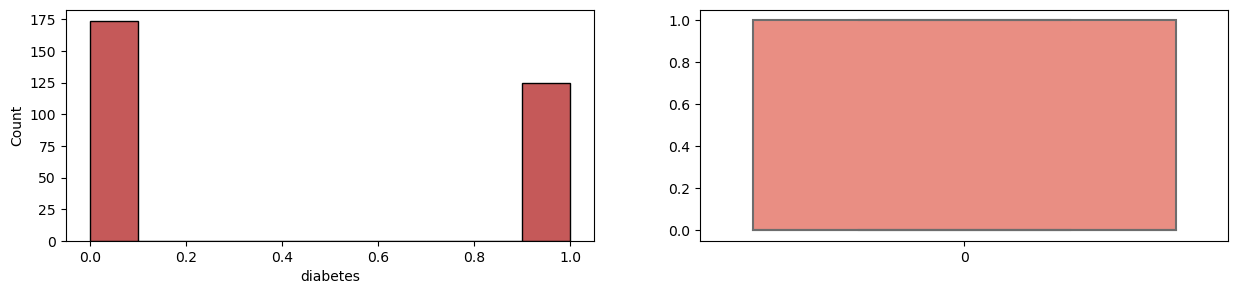

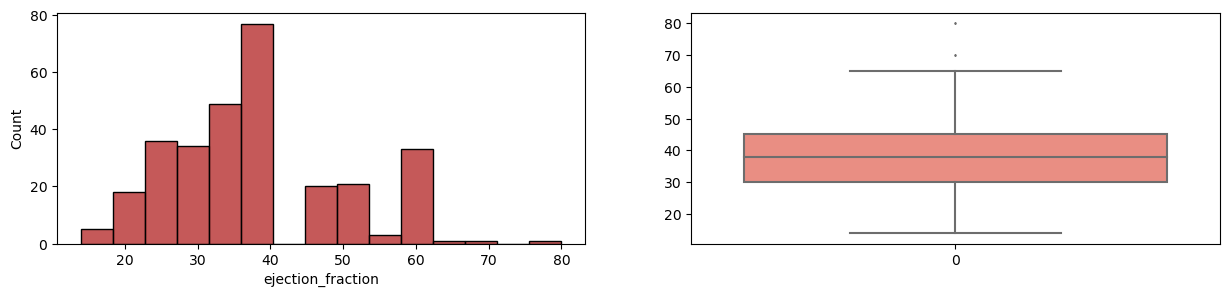

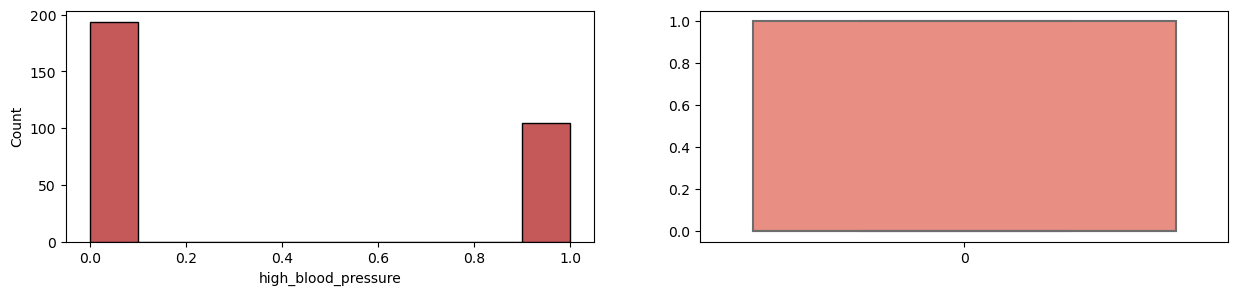

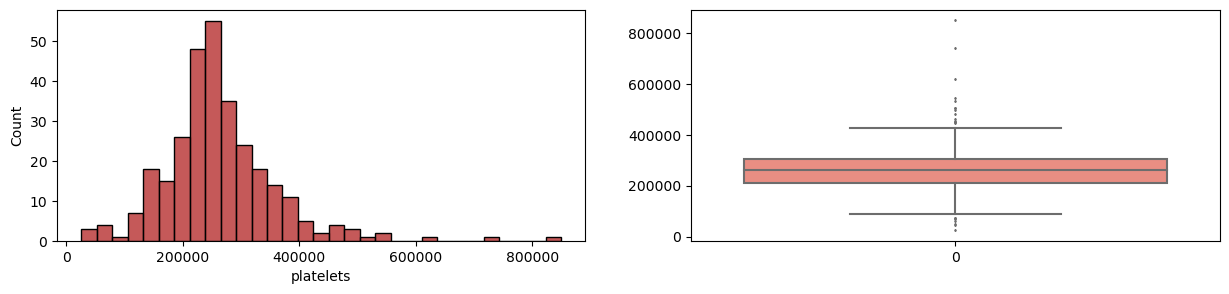

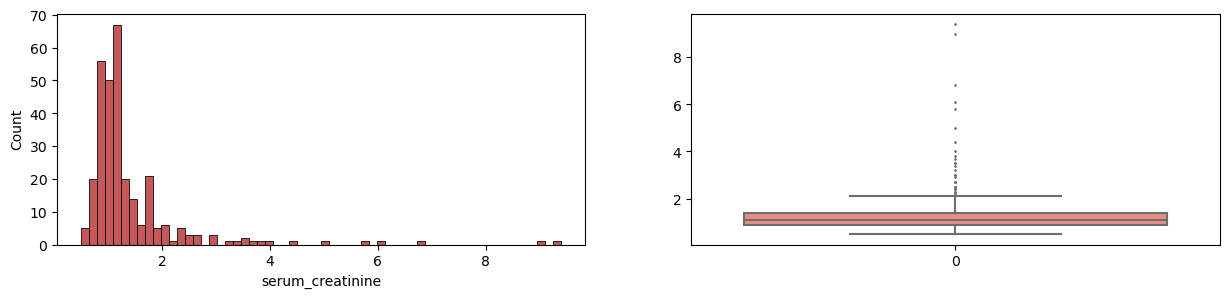

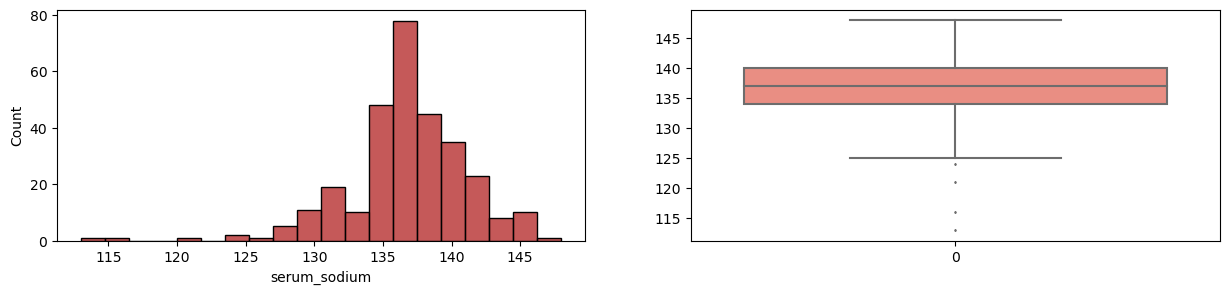

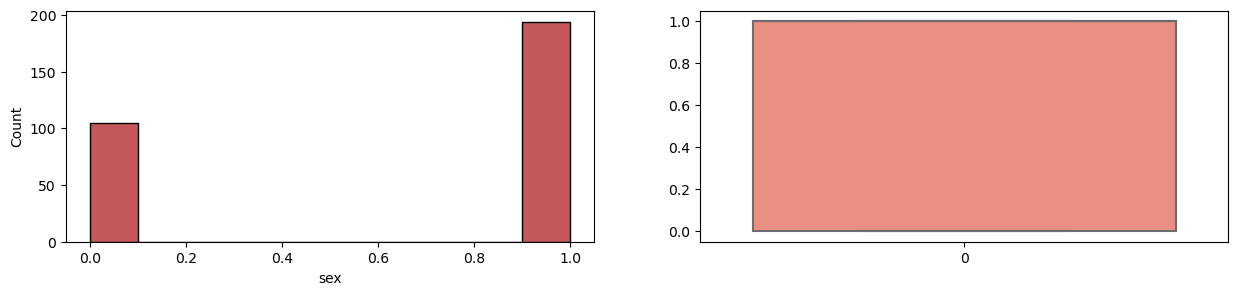

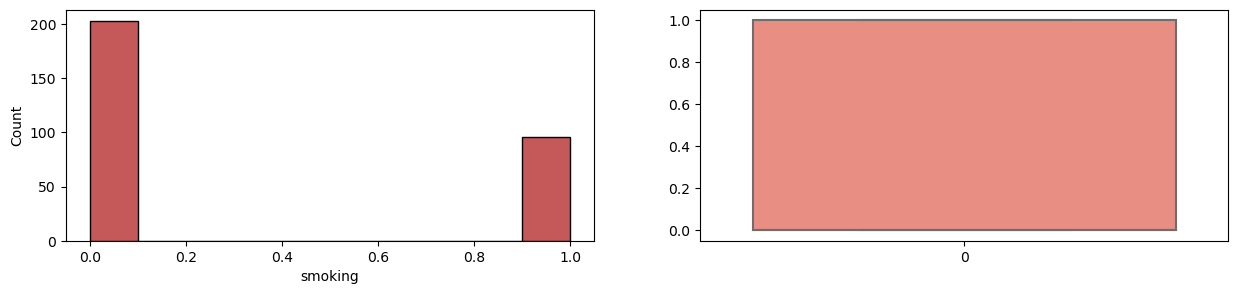

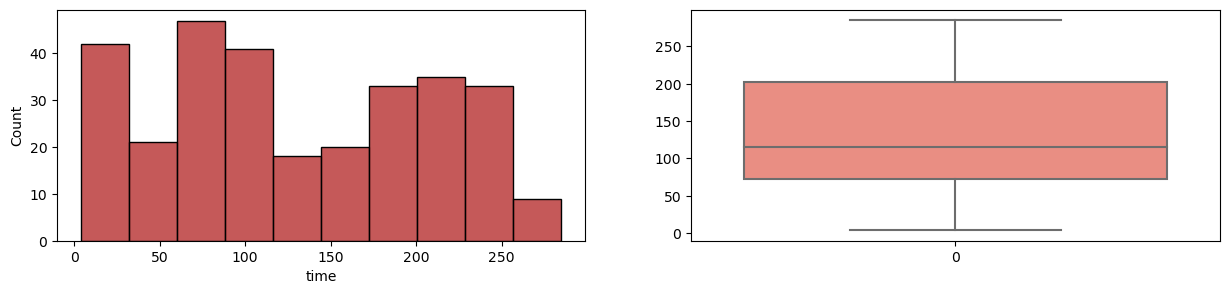

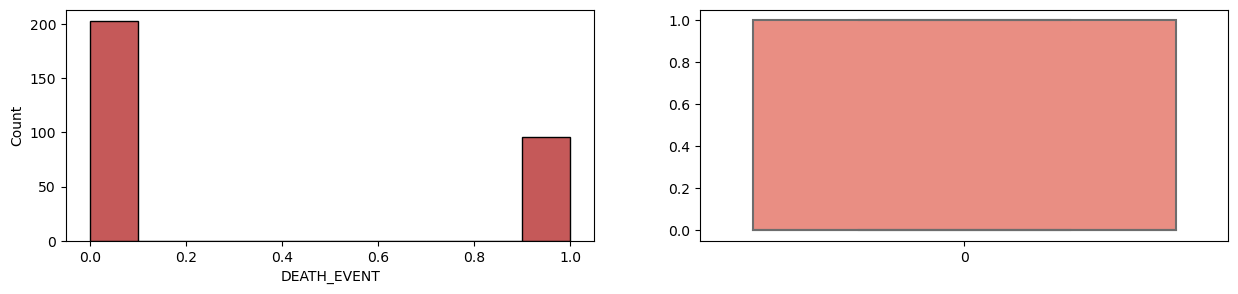

In [12]:
# Menampilkan visualisasi distribusi dari kolom numerik
for i in numerical:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i], color='firebrick', ax=axs[0])
    sns.boxplot(df[i], ax = axs[1], color='salmon', fliersize=1)

Berdasarkan visualisasi di atas terlihat bahwa data masih belum terdistribusi normal dikarenakan masih terdapat banyak data null. Sehingga diperlukan data mean/median dari setiap kolom null untuk mengisinya. Jika terdapat skewness maka diperlukan pengisian nilai yang kosong pada kolom dengan median

## 4.4 Mengecek Outlier Kolom Numerik

In [13]:
# Membuat list untuk kolom yang memiliki outliers
outlier = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Handling outlier
for col in outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    df.loc[df[col] < lower_boundary, col] = lower_boundary
    df.loc[df[col] > upper_boundary, col] = upper_boundary

In [14]:
# Lower limit
Q1 = df[outlier].quantile(0.25)

# Upper limit
Q3 = df[outlier].quantile(0.75)

IQR = Q3 - Q1

# Lower limit
low_limit = pd.DataFrame({"Lower Limit": Q1 - 1.5*IQR})

# Upper limit
up_limit = pd.DataFrame({"Upper Limit": Q3 + 1.5*IQR})

# Apply into dataframe
dt_quartile = pd.concat([up_limit, low_limit], axis=1)
dt_quartile

,Upper Limit,Lower Limit
creatinine_phosphokinase,1280.25,-581.75
ejection_fraction,67.50,7.50
platelets,440000.00,76000.00
serum_creatinine,2.15,0.15
serum_sodium,149.00,125.00


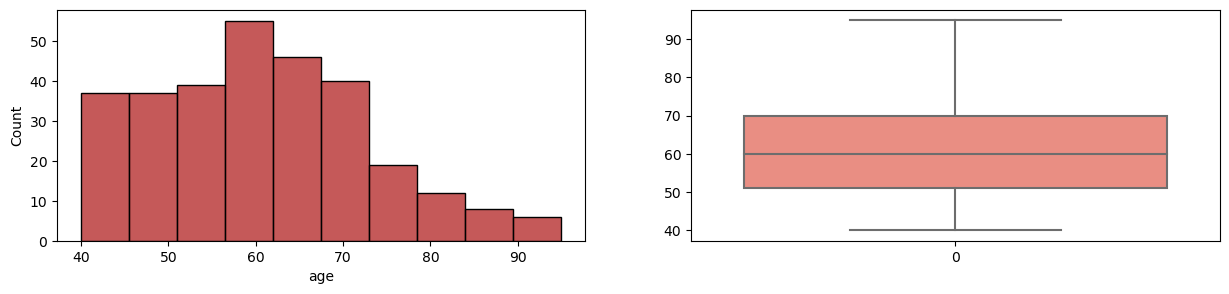

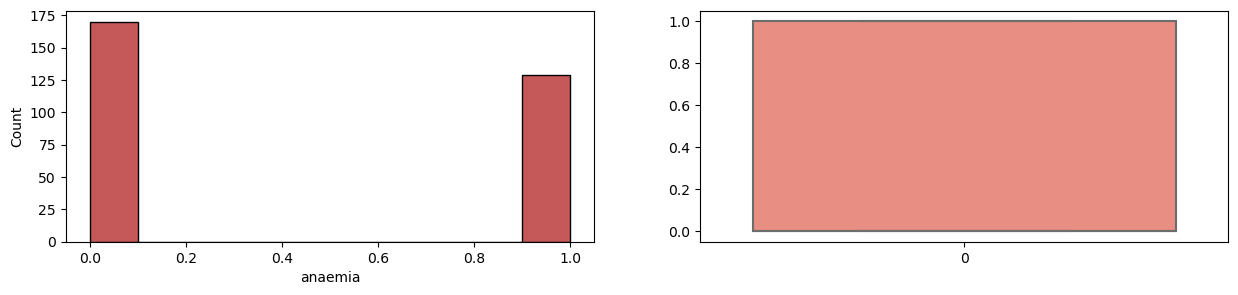

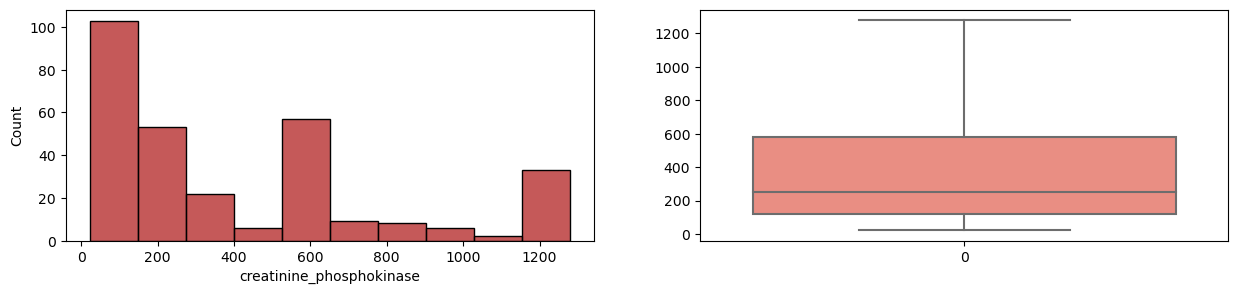

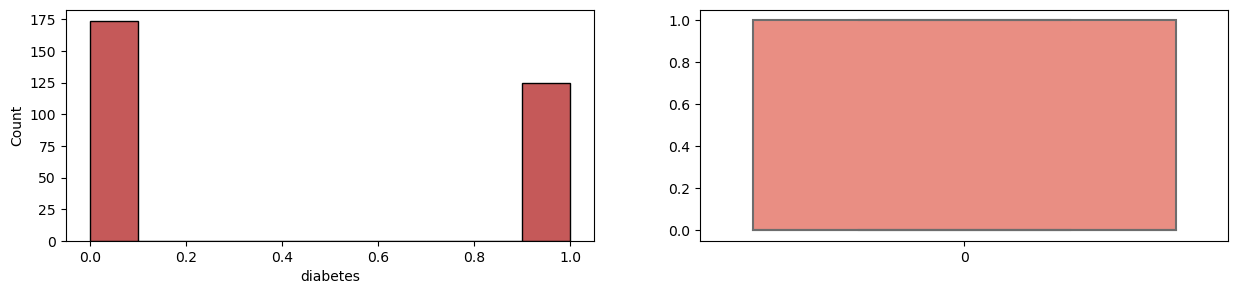

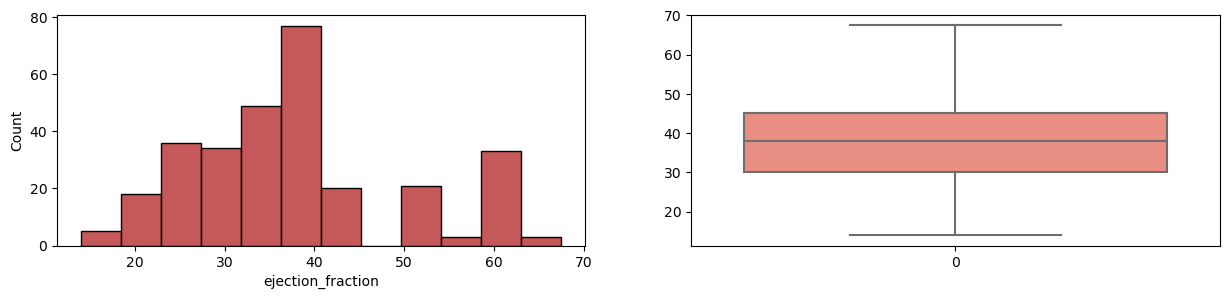

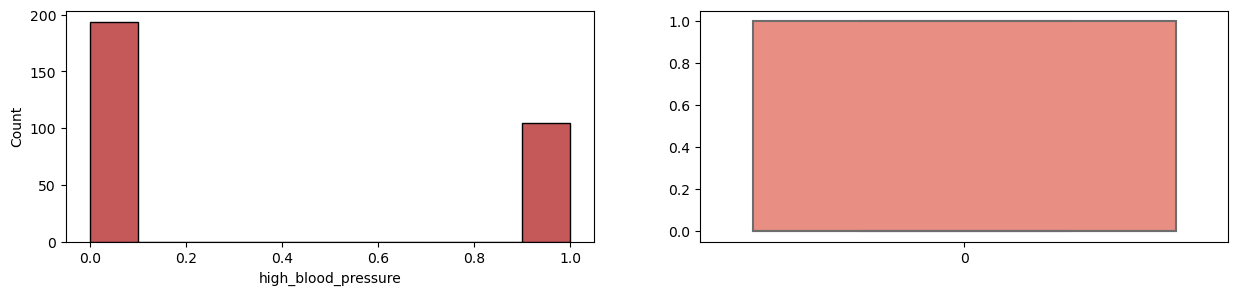

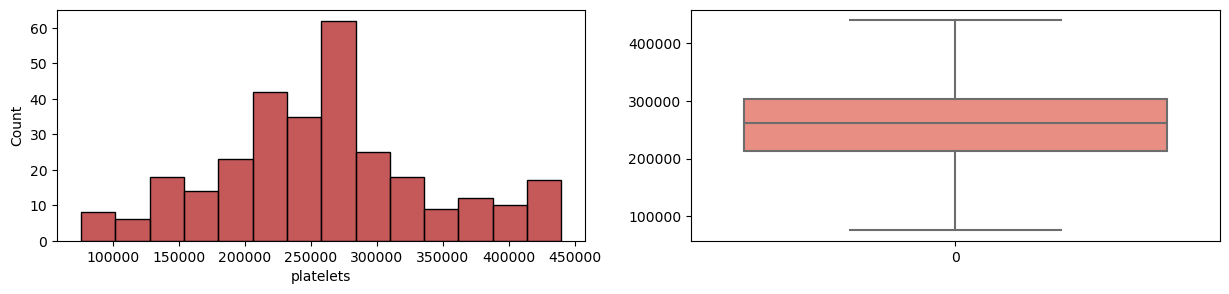

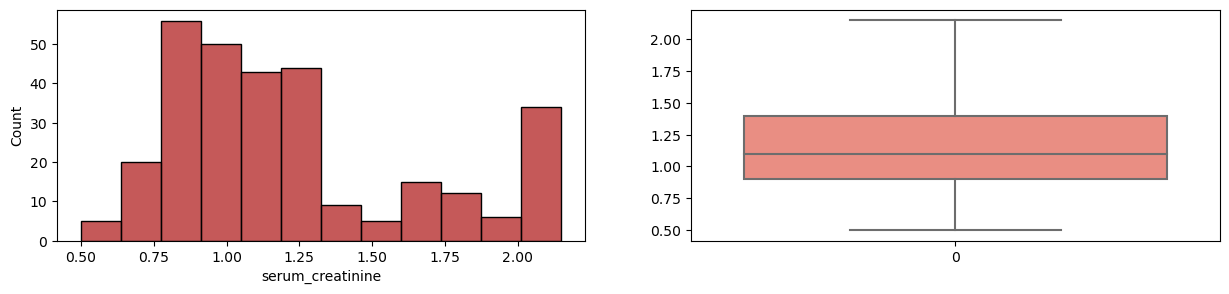

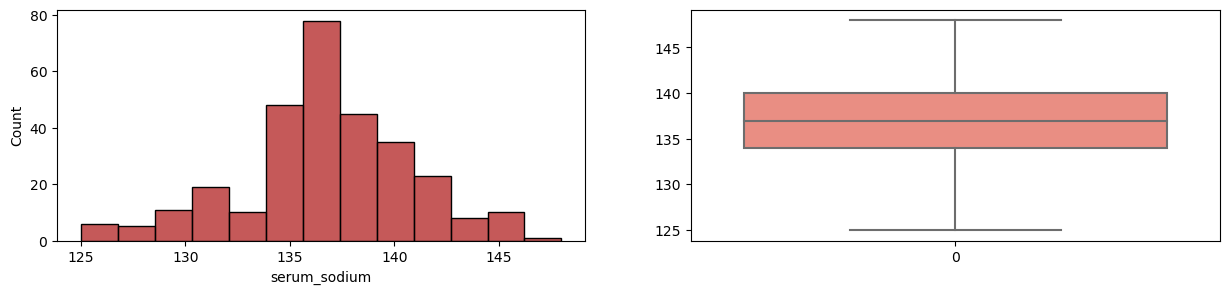

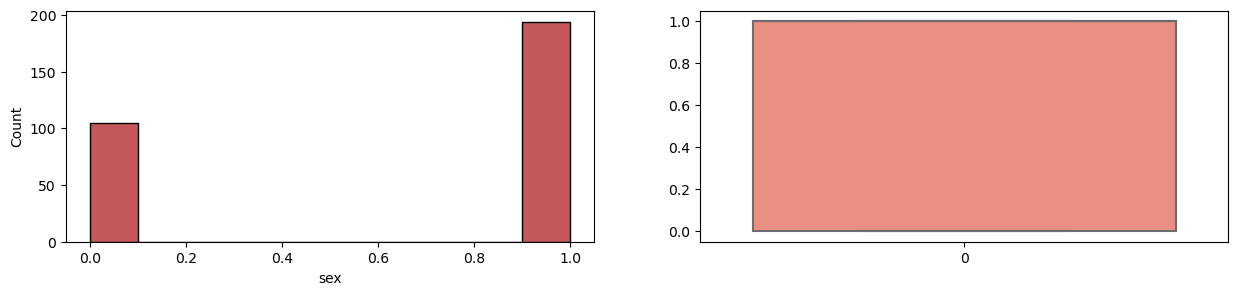

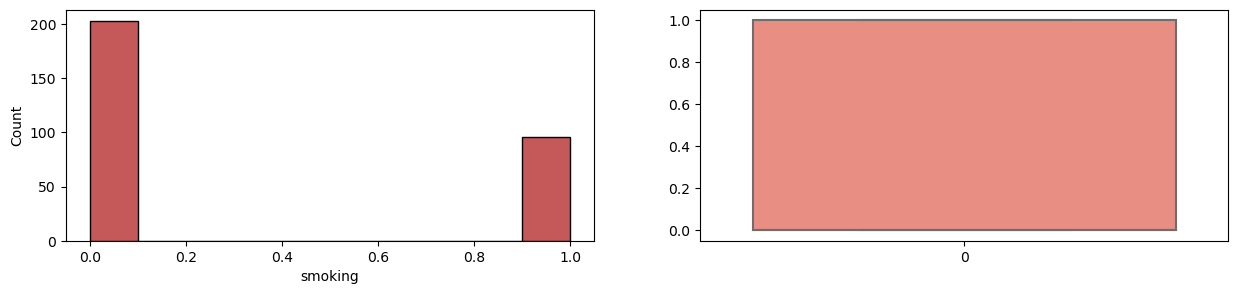

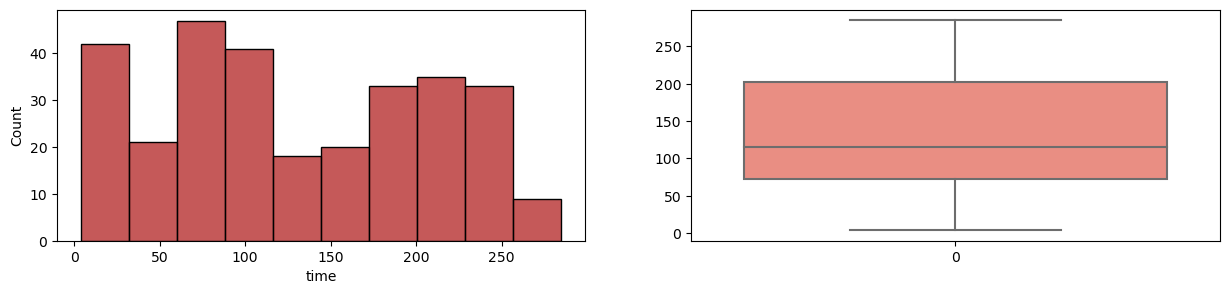

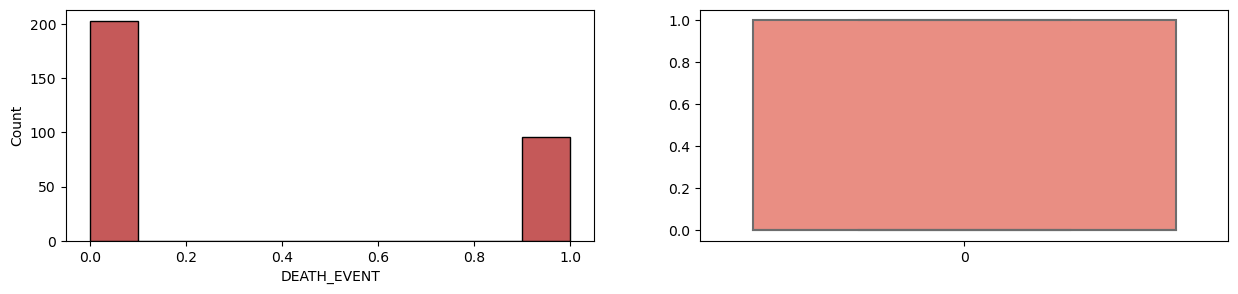

In [15]:
# Mengecek kembali outlier menggunakan boxplot
for i in numerical:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i], color='firebrick', ax=axs[0])
    sns.boxplot(df[i], ax = axs[1], color='salmon', fliersize=1)

# 5. Exploratory Data Analysis (EDA)

## 5.1 Melihat Deskripsi Data

In [16]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,424.214883,0.418060,38.033445,0.351171,259163.714883,1.234515,136.712375,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,385.449328,0.494067,11.685643,0.478136,81478.304369,0.440098,4.076971,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,76000.000000,0.500000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1280.250000,1.000000,67.500000,1.000000,440000.000000,2.150000,148.000000,1.000000,1.00000,285.000000,1.00000


**Age:**
* Usia yang tercatat dimulai dari umur 40 sampai 95 tahun
* Rata-rata usia pada pasien penyakit jantung berada pada umur 60 tahun
* Usia terendah pada pasien penyakit jantung adalah 40 tahun
* Usia tertinggi pada pasien penyakit jantung adalah 95 tahun

Untuk detail feature lainnya dapat dilihat pada deskripsi ringkasan tabel di atas

In [17]:
# Rename nama kolom
df.rename(columns={'anaemia':'anemia', 'creatinine_phosphokinase':'CPK', 'high_blood_pressure':'hypertension', 'DEATH_EVENT':'DEATH'}, inplace=True)
df.head()

,age,anemia,CPK,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1


Dilakukan pengubahan nama kolom dengan fungsi .rename guna mempermudah pemahaman terhadap kolom-kolom data. 
* anaemia di-rename dengan anemia
* creatinine_phosphokinase di-rename dengan CPK
* high_blood_pressure di-rename dengan hypertension
* DEATH_EVENT di-rename dengan DEATH

In [18]:
df1 = df.copy()

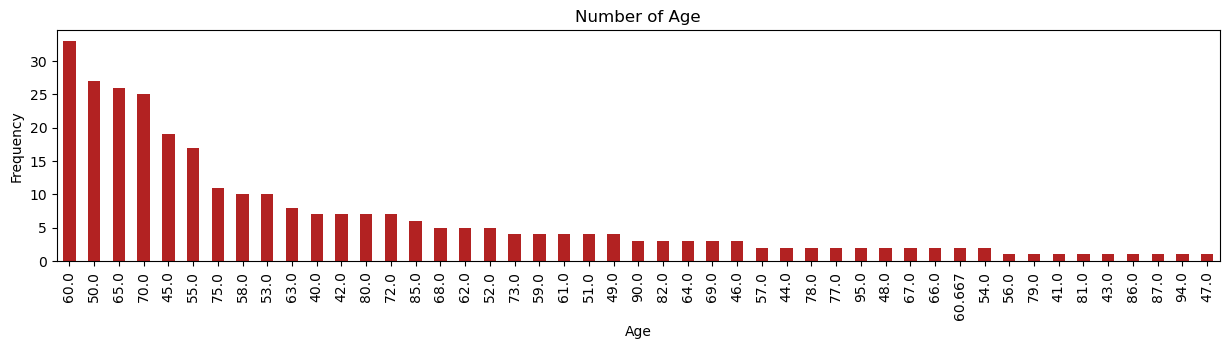

In [19]:
# Jumlah pasien penyakit jantung berdasarkan usia
df_age = df1.value_counts('age')
df_age.plot(kind='bar', figsize=(15, 3), color='firebrick')

plt.title('Number of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Dari dataset yang tercatat kebanyakan berumur 60 tahun

In [20]:
# Melihat death_event berdasarkan kelompok usia
death_event_40s=df1.loc[df['age']<50,'DEATH'].value_counts()
death_event_50s=df1.loc[df['age']<60,'DEATH'].value_counts()
death_event_60s=df1.loc[df['age']<70,'DEATH'].value_counts()
death_event_70s=df1.loc[df['age']<80,'DEATH'].value_counts()
death_event_80s=df1.loc[df['age']<90,'DEATH'].value_counts()
death_event_90s=df1.loc[df['age']<100,'DEATH'].value_counts()

# Membuat data frame dari fitur DEATH berdasarkan pengelompokan usia
df_deathByAge=pd.DataFrame({'40s':death_event_40s,'50s':death_event_50s, '60s':death_event_60s,'70s':death_event_70s, '80s':death_event_80s,'90s':death_event_90s})
df_deathByAge=df_deathByAge.transpose()
df_deathByAge

DEATH,0,1
40s,36,11
50s,98,31
60s,164,58
70s,196,78
80s,202,91
90s,203,96


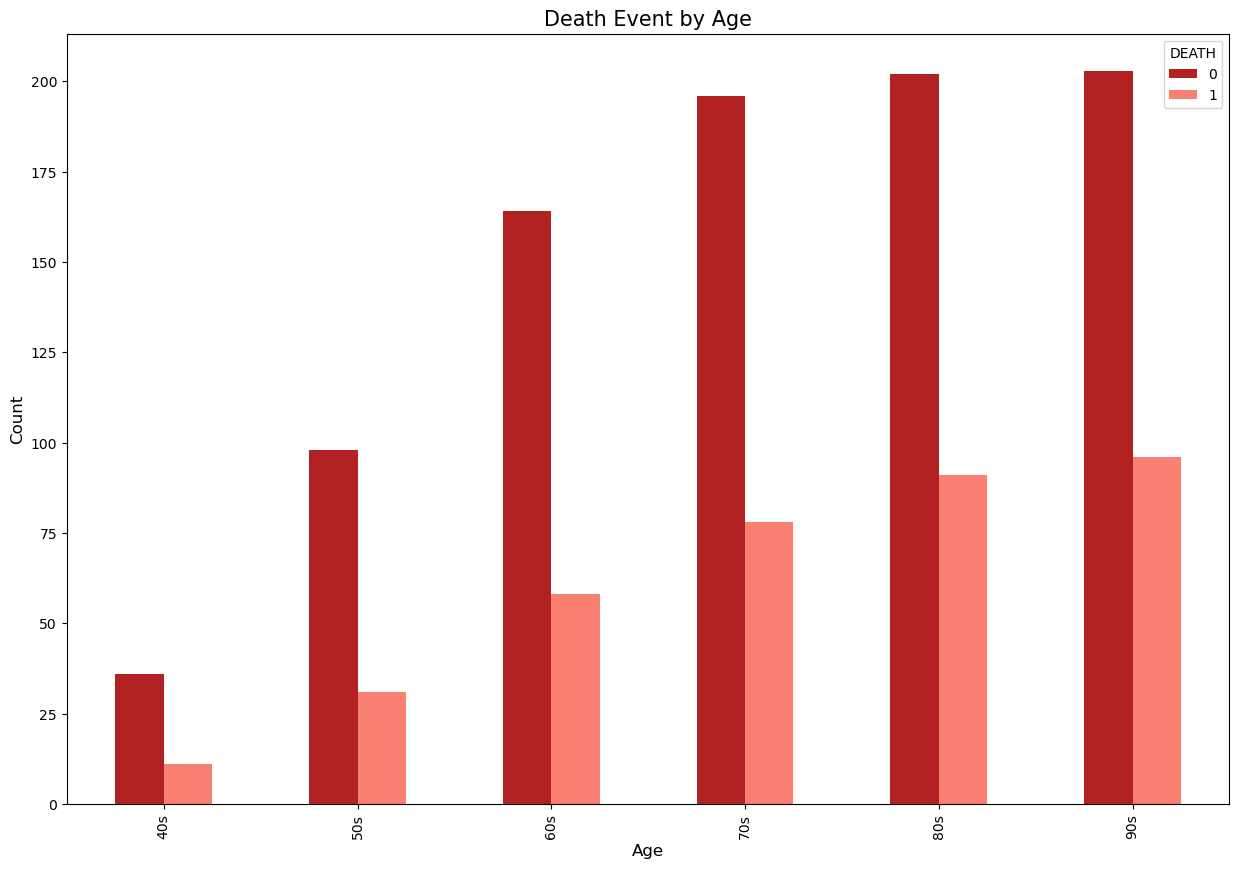

In [21]:
# Visualisasi data death event berdasarkan kelompok usia
df_deathByAge.plot(kind='bar', figsize=(15, 10), color=['firebrick','salmon'])
plt.title('Death Event by Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Dari data di atas terlihat bahwa semakin tinggi usia seseorang, maka semakin rentan terkena penyakit jantung dan semakin besar juga jumlah meninggalnya.

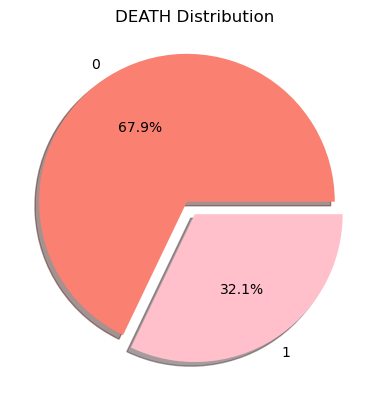

In [22]:
# Distribution of target
plt.pie(df1.DEATH.value_counts(normalize=True)*100, colors=['salmon','pink'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.0], labels=[0,1])
plt.title('DEATH Distribution')
plt.show()

Visualisasi diatas digunakan untuk melihat perbedaan frekuensi kategori 0 dan 1 pada kolom target yaitu kolom DEATH. Dapat dilihat bahwa adanya perbedaan frekuensi yang cukup signifikan. Kategori 0 sebesar 67.9%, sedangkan kategori 1 sebesar 32.1%. Artinya, orang yang tidak meninggal lebih besar frekuensinya dari yang meninggal

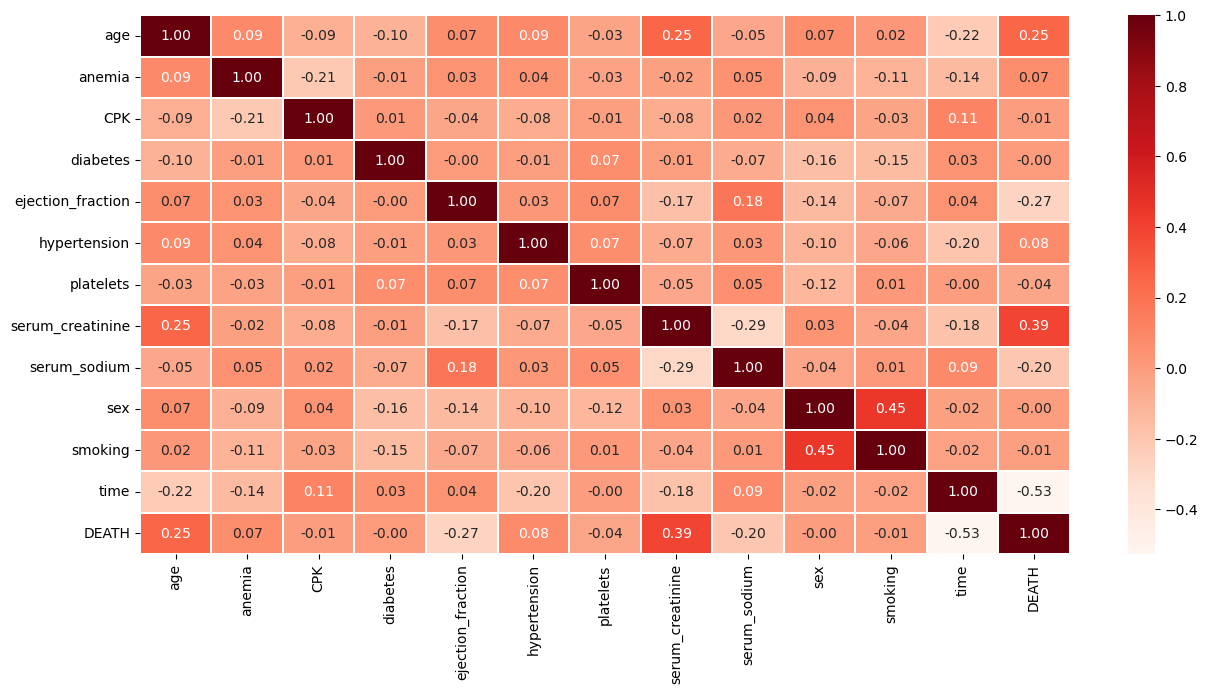

In [23]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=0.3, cmap='Reds', ax=ax)
plt.show()

Visualisasi headmap diatas mempresentasikan tentang korelasi antar kolom pada dataset yang digunakan

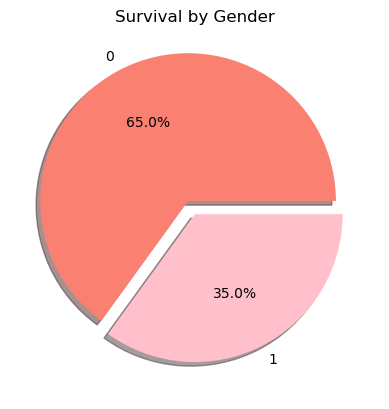

In [24]:
survived = df1[df1['DEATH'] == 0]

plt.pie(survived.sex.value_counts(normalize=True)*100, colors=['salmon','pink'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.0], labels=[0,1])
plt.title('Survival by Gender')
plt.show()

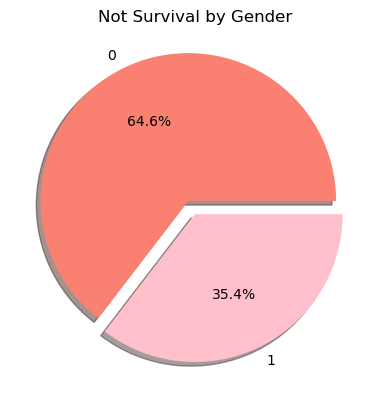

In [25]:
not_survived = df1[df1['DEATH'] == 1]

plt.pie(not_survived.sex.value_counts(normalize=True)*100, colors=['salmon','pink'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.0], labels=[0,1])
plt.title('Not Survival by Gender')
plt.show()

In [26]:
# Jumlah yang meninggal dan tidak berdasarkan gender
female = df1[df1['sex'] == 0]
male = df1[df1['sex'] == 1]
male_not_survived = len(male[male['DEATH'] == 1])
female_not_survived = len(female[female['DEATH'] == 1])
male_survived = len(male[male['DEATH'] == 0])
female_survived = len(female[female['DEATH'] == 0])
df_survivalBySex = pd.DataFrame({'Keterangan': ['male_not_survived', 'female_not_survived', 'male_survived', 'female_survived'],
                                 'Number': [male_not_survived, female_not_survived, male_survived, female_survived]})
df_survivalBySex = df_survivalBySex.set_index('Keterangan')
df_survivalBySex

,Number
Keterangan,
male_not_survived,62
female_not_survived,34
male_survived,132
female_survived,71


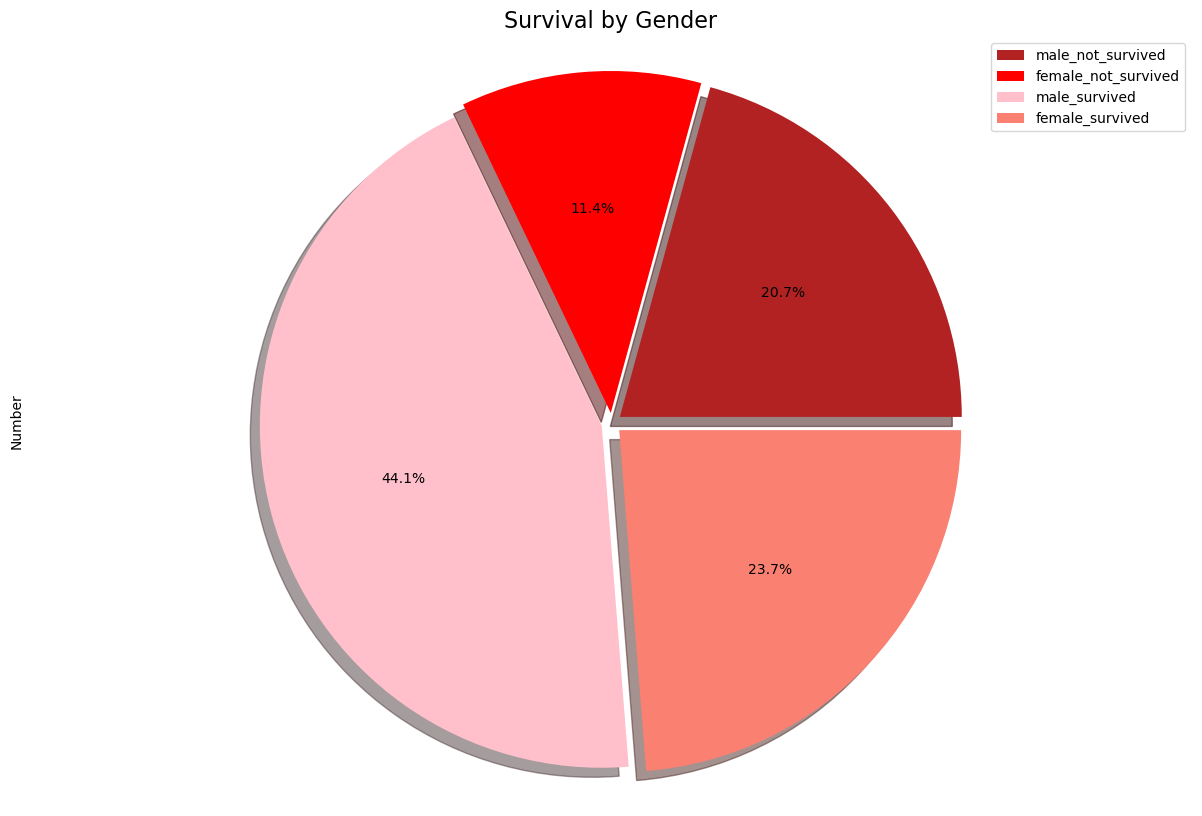

In [27]:
# Membuat pie chart dari survival berdasarkan gender
color_list = ['firebrick', 'red', 'pink', 'salmon']
df_survivalBySex['Number'].plot(kind='pie', figsize=(15, 10), autopct='%1.1f%%', colors=color_list, shadow=True, explode=[0.03, 0.03, 0.03, 0.03], labels=None)
plt.title('Survival by Gender', fontsize=16)
plt.axis('equal')
plt.legend(labels = df_survivalBySex.index)

Persentase paling banyak yang tidak selamat karena penyakit jantung berdasarkan gender adalah laki-laki yaitu sebesar 64.6%

In [28]:
male_smoking = len(male[male['smoking']==1])
female_smoking = len(female[female['smoking']==1])
male_not_smoking = len(male[male['smoking']==0])
female_not_smoking = len(female[female['smoking']==0])
df_smokingByGender = pd.DataFrame({'Keterangan':['male_smoking','female_smoking','male_not_smoking','female_not_smoking'],
                                   'Number':[male_smoking, female_smoking, male_not_smoking, female_not_smoking]})
df_smokingByGender = df_smokingByGender.set_index('Keterangan')
df_smokingByGender

,Number
Keterangan,
male_smoking,92
female_smoking,4
male_not_smoking,102
female_not_smoking,101


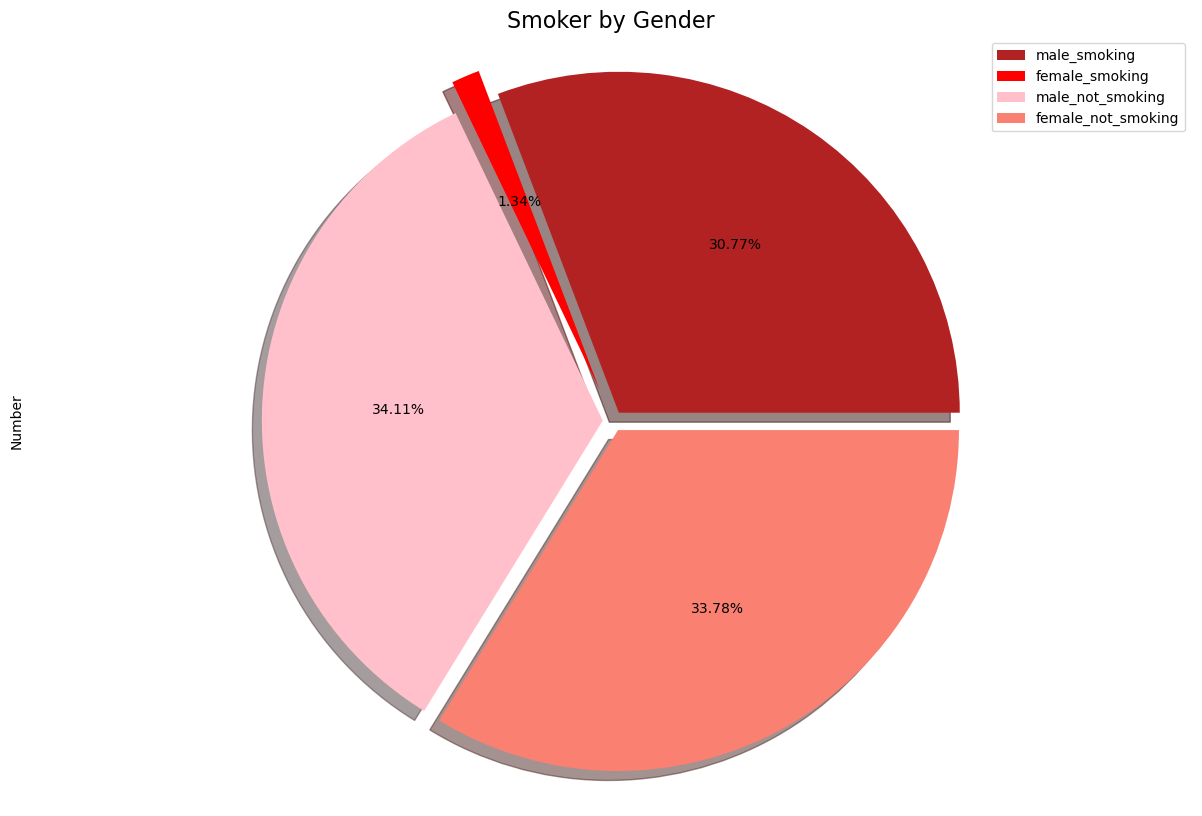

In [29]:
# Membuat pie chart smoking by gender
color_list = ['firebrick', 'red', 'pink', 'salmon']
df_smokingByGender['Number'].plot(kind='pie', figsize=(15, 10), autopct='%1.2f%%', colors=color_list, shadow=True, explode=[0.03, 0.1, 0.03, 0.03], labels=None)
plt.title('Smoker by Gender', fontsize=16)
plt.axis('equal')
plt.legend(labels = df_smokingByGender.index)

Merokok meningkatkan kemungkinan kematian akibat penyakit jantung, seperti yang ditunjukkan oleh data ini: perokok perempuan hanya 1.34%, dan perokok laki-laki 30.8%. Selain itu, akan dibuat grafik yang menunjukkan jumlah kematian berdasarkan orang yang merokok dan orang yang tidak merokok.

In [30]:
# Jumlah orang yang merokok
len(df1[df1['smoking']==1])

96

In [31]:
df_deathBySmoking=df1.groupby(['smoking','DEATH'])['DEATH'].count().unstack()
df_deathBySmoking

DEATH,0,1
smoking,,
0,137,66
1,66,30


In [32]:
survive = df1[df1['DEATH']==0]
death = df1[df1['DEATH']==1]
survive_smoking = len(survive[survive['smoking']==1])
death_smoking = len(death[death['smoking']==1])
survive_not_smoking = len(survive[survive['smoking']==0])
death_not_smoking = len(death[death['smoking']==0])
df_deathBySmoking2 = pd.DataFrame({'Keterangan':['survive_smoking','death_smoking','survive_not_smoking','death_not_smoking'],
                                   'Number':[survive_smoking,death_smoking,survive_not_smoking,death_not_smoking]})
df_deathBySmoking2 = df_deathBySmoking2.set_index('Keterangan')
df_deathBySmoking2

,Number
Keterangan,
survive_smoking,66
death_smoking,30
survive_not_smoking,137
death_not_smoking,66


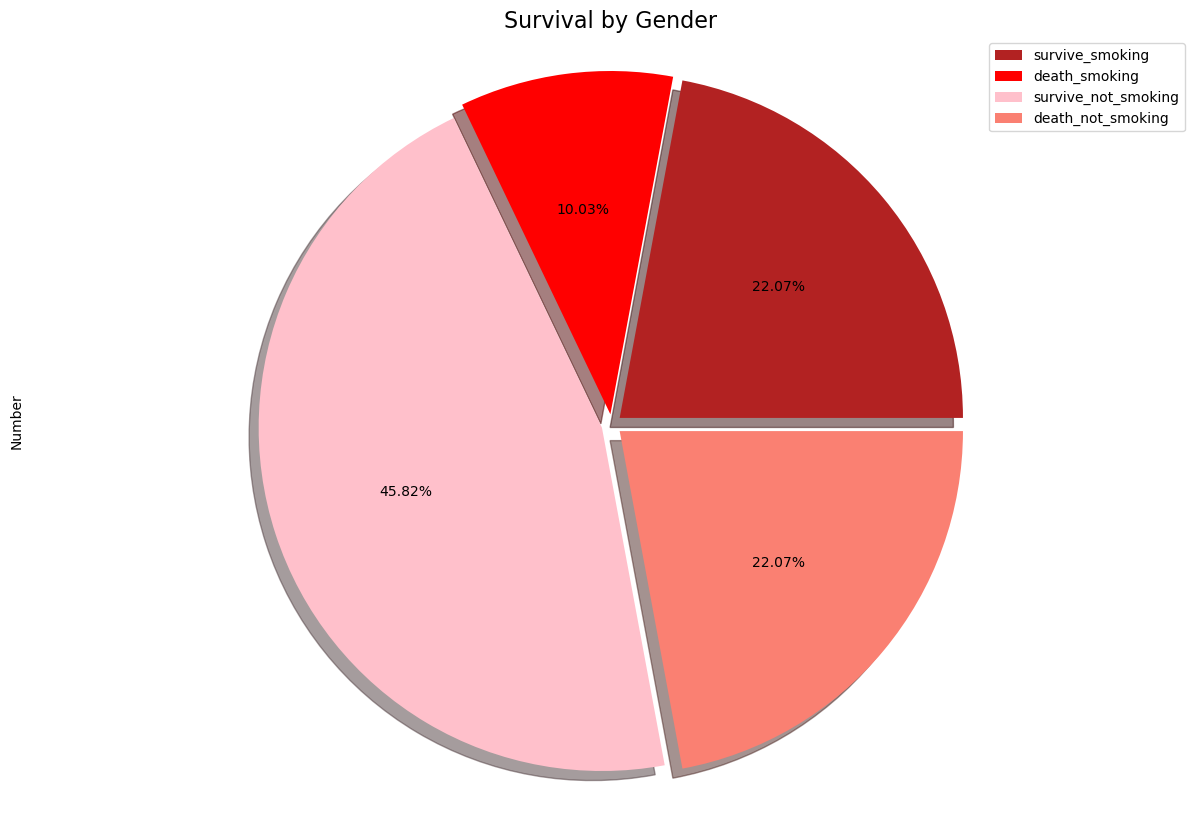

In [33]:
# Membuat pie chart DEATH by Smoking
color_list = ['firebrick', 'red', 'pink', 'salmon']
df_deathBySmoking2['Number'].plot(kind='pie', figsize=(15, 10), autopct='%1.2f%%', colors=color_list, shadow=True, explode=[0.03, 0.03, 0.03, 0.03], labels=None)
plt.title('Survival by Gender', fontsize=16)
plt.axis('equal')
plt.legend(labels = df_deathBySmoking2.index)

Text(0.5, 1.0, 'Jumlah Kematian Berdasarkan Perokok dan Bukan Perokok')

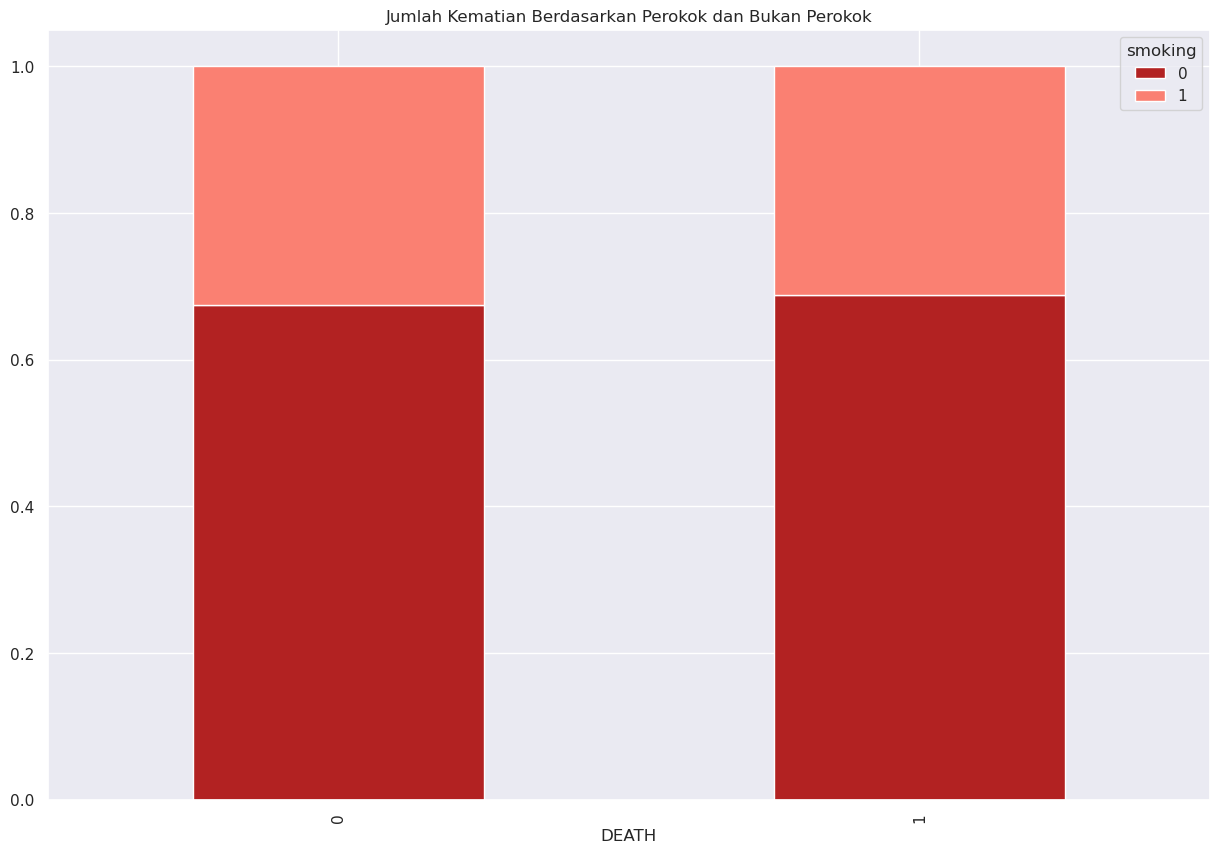

In [34]:
sns.set(rc={'figure.figsize':(15, 10)})
pd.crosstab(df1.DEATH, df1.smoking, normalize = 'index').plot(kind='bar', stacked = True, color=['firebrick', 'salmon'])
plt.title('Jumlah Kematian Berdasarkan Perokok dan Bukan Perokok')

Seperti yang ditunjukkan oleh pie chart dan bar chart, orang yang tidak merokok mengalami tingkat kematian yang lebih rendah, yaitu dengan persentase sebanyak 45.82%. Namun, dari 299 orang, 96 dari mereka yang merokok mengidap penyakit jantung, yang merupakan penyebab utama kematian dari penyakit jantung.

In [35]:
df

,age,anemia,CPK,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


In [36]:
# Jumlah penderita anemia
anemia = len(df1[df1['anemia']==1])
not_anemia = len(df1[df1['anemia']==0])

# Jumlah penderita diabetes
diabetes = len(df1[df1['diabetes']==1])
not_diabetes = len(df1[df1['diabetes']==0])

# Jumlah penderita hipertensi
hypertension = len(df1[df1['hypertension']==1])
not_hypertension = len(df1[df1['hypertension']==0])

# Membuat dataframe dari jumlah penderita diabetes, anemia, dan hipertensi
df_anemia_diabet_hyper = pd.DataFrame(
    {'Keterangan':['anemia', 'diabetes', 'hypertension'],
     'No':[not_anemia, not_diabetes, not_hypertension],
    'Yes':[anemia, diabetes, hypertension]})

# Mensetting index
df_anemia_diabet_hyper = df_anemia_diabet_hyper.set_index('Keterangan')
df_anemia_diabet_hyper

,No,Yes
Keterangan,,
anemia,170,129
diabetes,174,125
hypertension,194,105


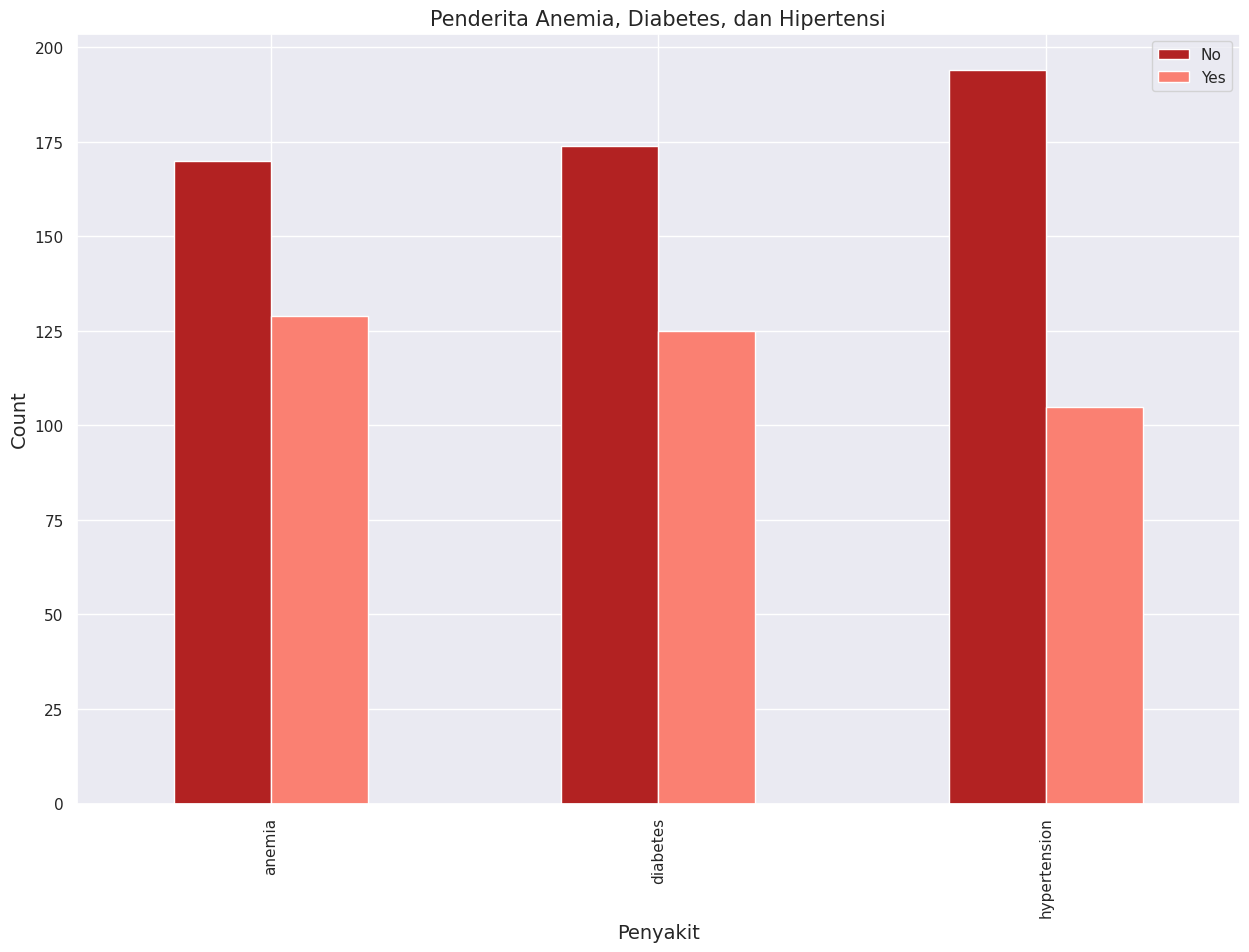

In [37]:
# Visualisasi data penderita anemia, diabetes, dan hipertensi
df_anemia_diabet_hyper.plot(kind='bar', figsize=(15, 10), color=['firebrick','salmon'])
plt.title('Penderita Anemia, Diabetes, dan Hipertensi', fontsize=15)
plt.xlabel('Penyakit', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Penderita penyakit jantung paling sering memiliki anemia, diikuti oleh diabetes dan hipertensi.

In [38]:
# Mengambil data pasien yang memiliki riwayat ketiga penyakit tersebut
df_ADH = df1.loc[(df1['anemia']==1) & (df1['diabetes']==1) & (df1['hypertension']==1)]
death_ADH = len(df_ADH[df_ADH['DEATH']==1])
not_death_ADH = len(df_ADH[df_ADH['DEATH']==0])
print('Meninggal :', death_ADH)
print('Tidak Meninggal :', not_death_ADH)

Meninggal : 6
Tidak Meninggal : 11


In [39]:
# Mengambil data pasien yang memiliki riwayat penyakit anemia dan diabetes
df_AD=df1.loc[(df1['anemia']==1) & (df1['diabetes']==1)]
death_AD=len(df_AD[df_AD['DEATH']==1])
not_death_AD=len(df_AD[df_AD['DEATH']==0])
print('Meninggal :',death_AD)
print('Tidak Meninggal :', not_death_AD)

Meninggal : 18
Tidak Meninggal : 35


In [40]:
# Mengambil data pasien yang memiliki riwayat penyakit anemia dan hipertensi
df_AH = df1.loc[(df1['anemia']==1)  & (df['hypertension']==1)]
death_AH = len(df_AH[df_AH['DEATH']==1])
not_death_AH = len(df_AH[df_AH['DEATH']==0])
print('Meninggal :', death_AH)
print('Tidak Meninggal :', not_death_AH)

Meninggal : 19
Tidak Meninggal : 29


In [41]:
# Mengambil data pasien yang memiliki riwayat penyakit diabetes dan hipertensi
df_DH = df1.loc[(df1['diabetes']==1) & (df['hypertension']==1)]
death_DH = len(df_DH[df_DH['DEATH']==1])
not_death_DH = len(df_DH[df_DH['DEATH']==0])
print('Meninggal :',death_DH)
print('Tidak Meninggal :', not_death_DH)

Meninggal : 17
Tidak Meninggal : 26


In [42]:
# Mengambil data pasien yang memiliki riwayat penyakit anemia
df_A = df1.loc[(df1['anemia']==1) ]
death_A = len(df_A[df_A['DEATH']==1])
not_death_A = len(df_A[df_A['DEATH']==0])
print('Meninggal :', death_A)
print('Tidak Meninggal :', not_death_A)

Meninggal : 46
Tidak Meninggal : 83


In [43]:
# Mengambil data pasien yang memiliki riwayat penyakit diabetes
df_D = df1.loc[(df1['diabetes']==1)]
death_D = len(df_D[df_D['DEATH']==1])
not_death_D = len(df_D[df_D['DEATH']==0])
print('Meninggal :', death_D)
print('Tidak Meninggal :', not_death_D)

Meninggal : 40
Tidak Meninggal : 85


In [44]:
# Mengambil data pasien yang memiliki riwayat penyakit hipertensi
df_H = df1.loc[(df1['hypertension']==1)]
death_H = len(df_H[df_H['DEATH']==1])
not_death_H = len(df_H[df_H['DEATH']==0])
print('Meninggal :', death_H)
print('Tidak Meninggal :', not_death_H)

Meninggal : 39
Tidak Meninggal : 66


In [45]:
# Membuat dataframe baru berdasarkan informasi diatas
keterangan=['Anemia, Diabetes, dan Hipertensi',
           'Anemia dan Diabetes',
           'Anemia dan Hipertensi',
           'Diabetes dan Hipertensi',
           'Anemia','Diabetes','Hipertensi']
meninggal=[death_ADH, death_AD, death_AH, death_DH,
           death_A,death_D,death_H]
tidak_meninggal=[not_death_ADH, not_death_AD,
                not_death_AH, not_death_DH,
                not_death_A, not_death_D, not_death_H]
ADH_df=pd.DataFrame({'Keterangan':keterangan,'Meninggal':meninggal,
             'Tidak Meninggal':tidak_meninggal})
persen=pd.DataFrame({'Meninggal (%)':round((ADH_df['Meninggal']/(ADH_df['Meninggal']+ADH_df['Tidak Meninggal']))*100,2)})
ADH_df=pd.concat([ADH_df,persen], axis=1)
ADH_df

,Keterangan,Meninggal,Tidak Meninggal,Meninggal (%)
0,"Anemia, Diabetes, dan Hipertensi",6,11,35.29
1,Anemia dan Diabetes,18,35,33.96
2,Anemia dan Hipertensi,19,29,39.58
3,Diabetes dan Hipertensi,17,26,39.53
4,Anemia,46,83,35.66
5,Diabetes,40,85,32.00
6,Hipertensi,39,66,37.14


In [46]:
# Mengurutkan berdasarkan persentase kematian dari tertinggi ke terendah
ADH_df.sort_values(by='Meninggal (%)', ascending=False)

,Keterangan,Meninggal,Tidak Meninggal,Meninggal (%)
2,Anemia dan Hipertensi,19,29,39.58
3,Diabetes dan Hipertensi,17,26,39.53
6,Hipertensi,39,66,37.14
4,Anemia,46,83,35.66
0,"Anemia, Diabetes, dan Hipertensi",6,11,35.29
1,Anemia dan Diabetes,18,35,33.96
5,Diabetes,40,85,32.00


Berdasarkan tabel di atas, penderita penyakit jantung dengan riwayat anemia dan hipertensi atau diabetes dan hipertensi, memiliki persentase kematian yang paling tinggi. Persentase kematian juga menunjukkan angka di atas 30%, yang menunjukkan risiko kematian yang lebih tinggi bagi pasien penyakit jantung dengan riwayat anemia, hipertensi, atau diabetes.


In [47]:
# Menyimpan data kontinu dalam dataframe baru
kontinu=['age','CPK','ejection_fraction', 'platelets','serum_creatinine','serum_sodium','time']
df_kontinu=df1[kontinu]
df_kontinu.head()

,age,CPK,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582.00,20.0,265000.00,1.90,130,4
1,55.0,1280.25,38.0,263358.03,1.10,136,6
2,65.0,146.00,20.0,162000.00,1.30,129,7
3,50.0,111.00,20.0,210000.00,1.90,137,7
4,65.0,160.00,20.0,327000.00,2.15,125,8


In [48]:
# Melihat deskripsi statistika fitur kontinuous
df_kontinu.describe()

,age,CPK,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,424.214883,38.033445,259163.714883,1.234515,136.712375,130.260870
std,11.894809,385.449328,11.685643,81478.304369,0.440098,4.076971,77.614208
min,40.000000,23.000000,14.000000,76000.000000,0.500000,125.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.900000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.100000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.400000,140.000000,203.000000
max,95.000000,1280.250000,67.500000,440000.000000,2.150000,148.000000,285.000000


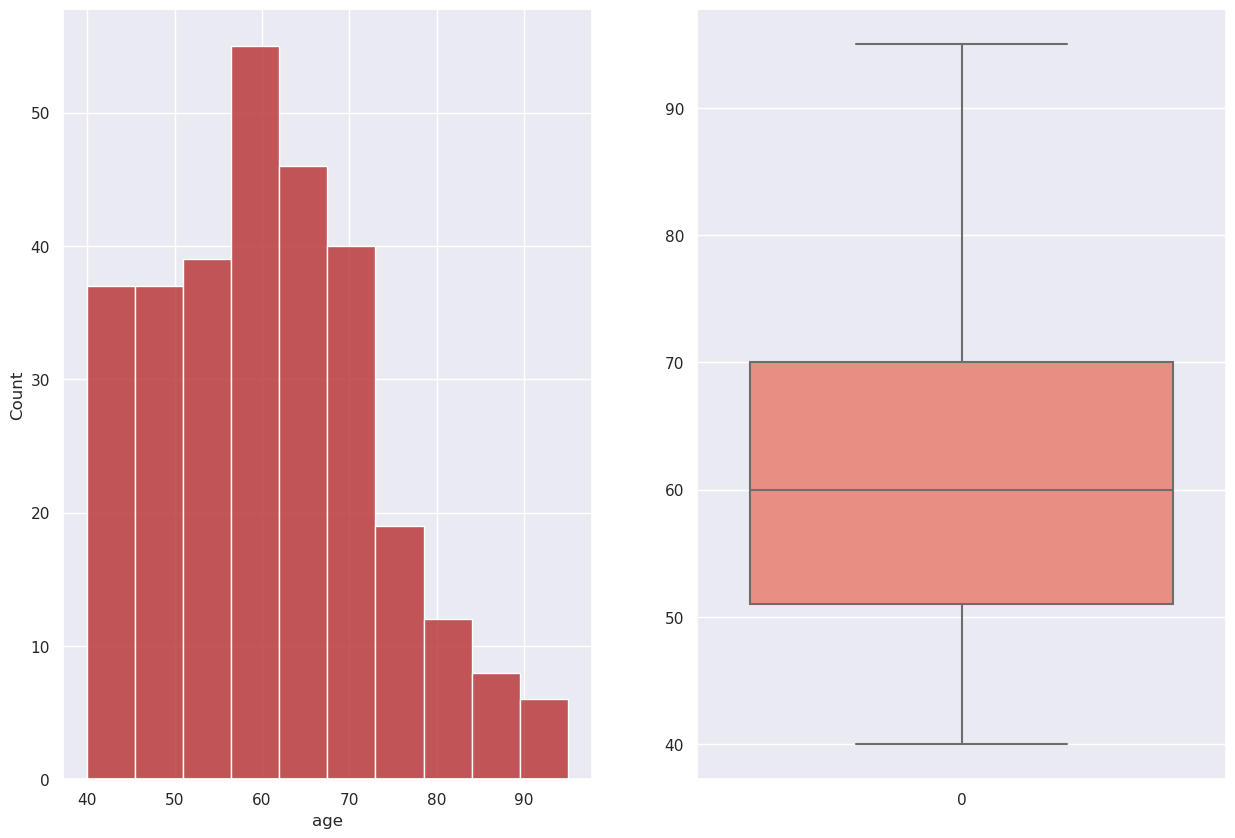

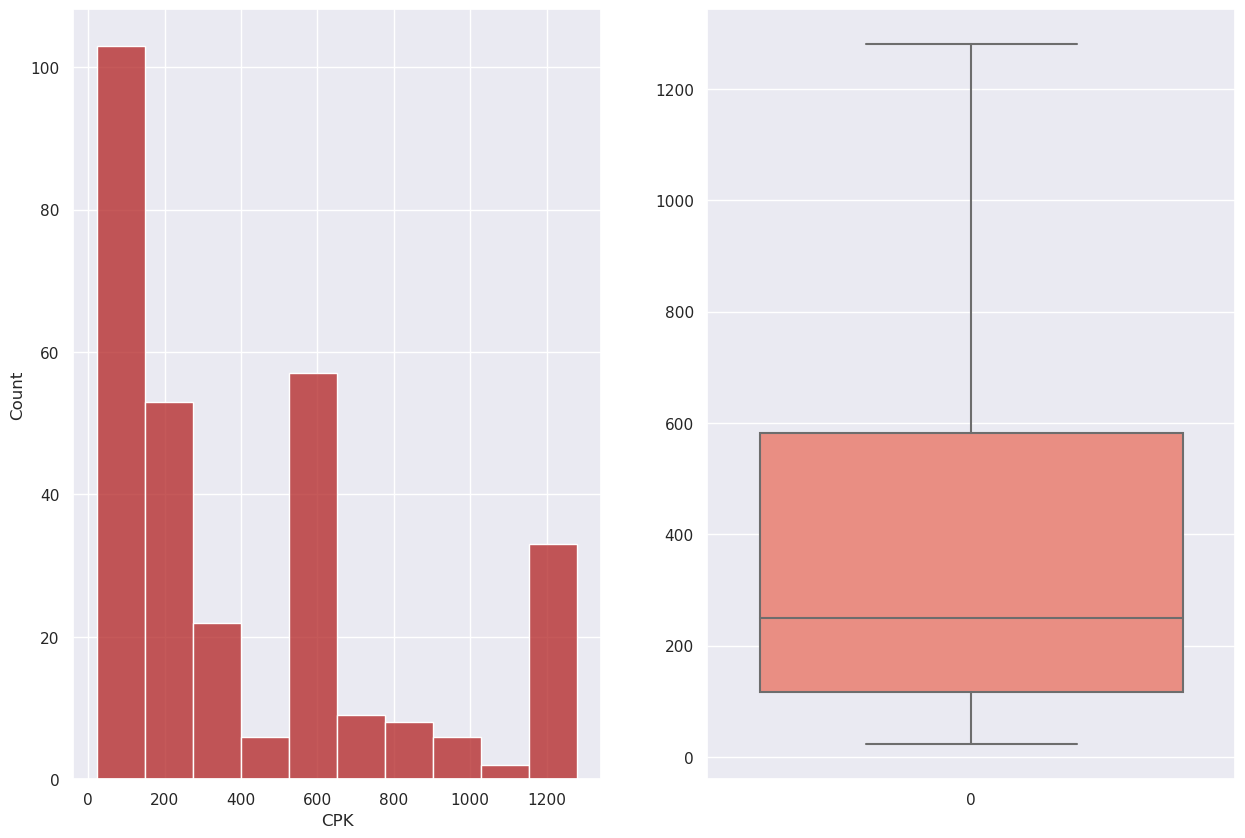

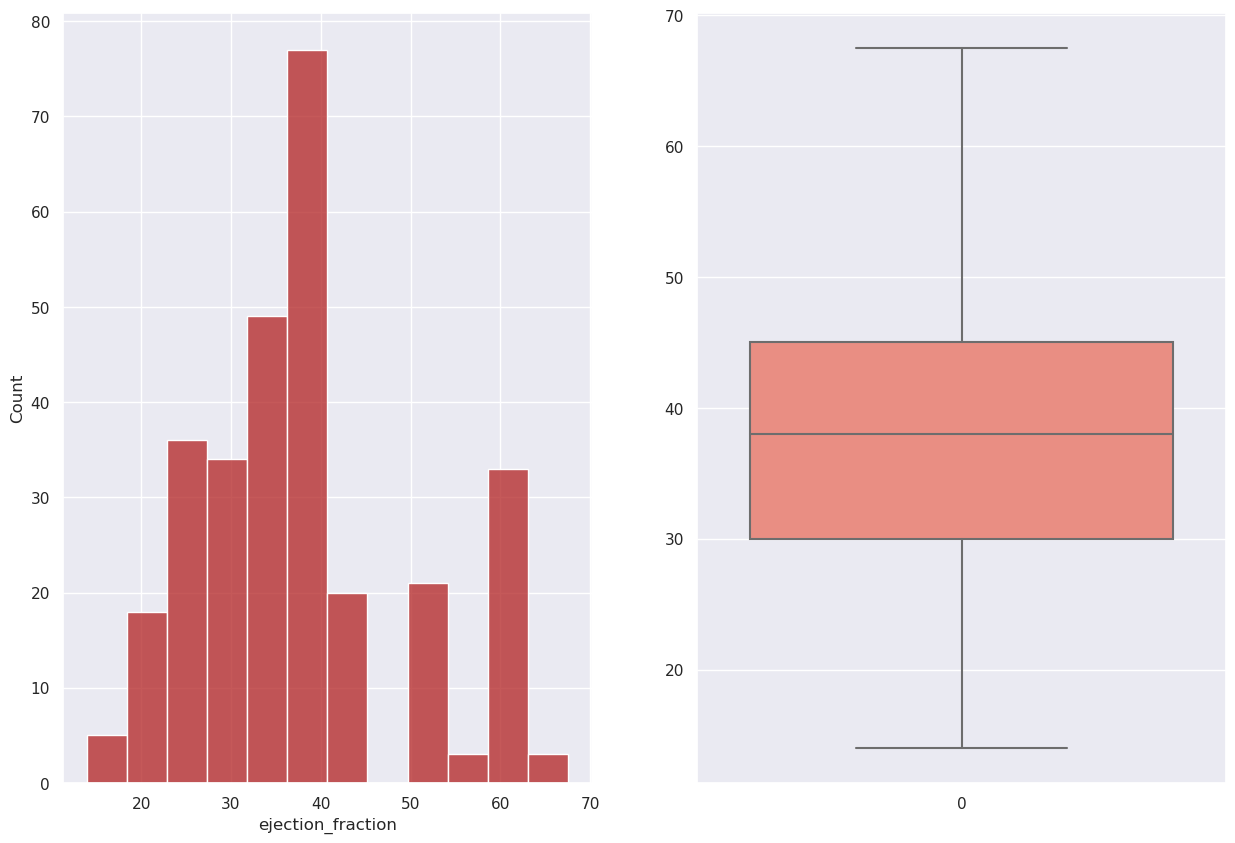

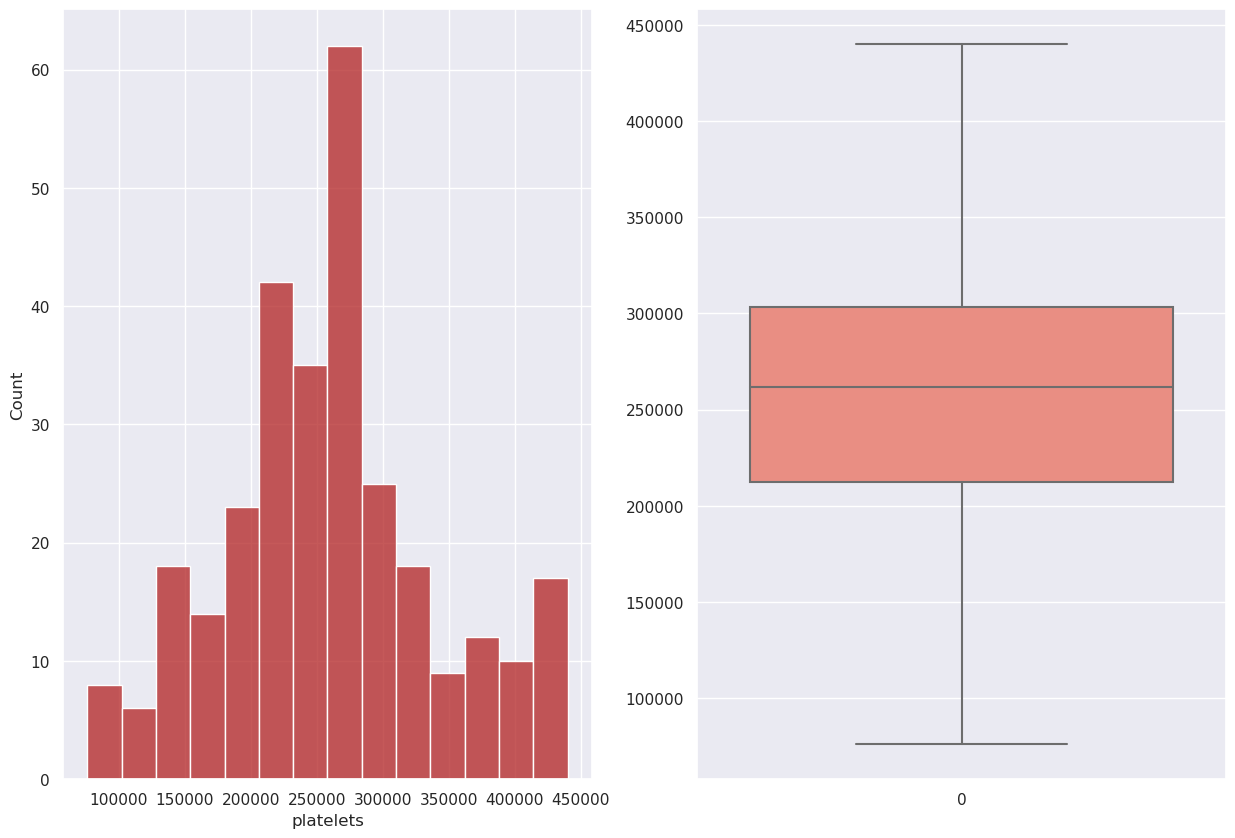

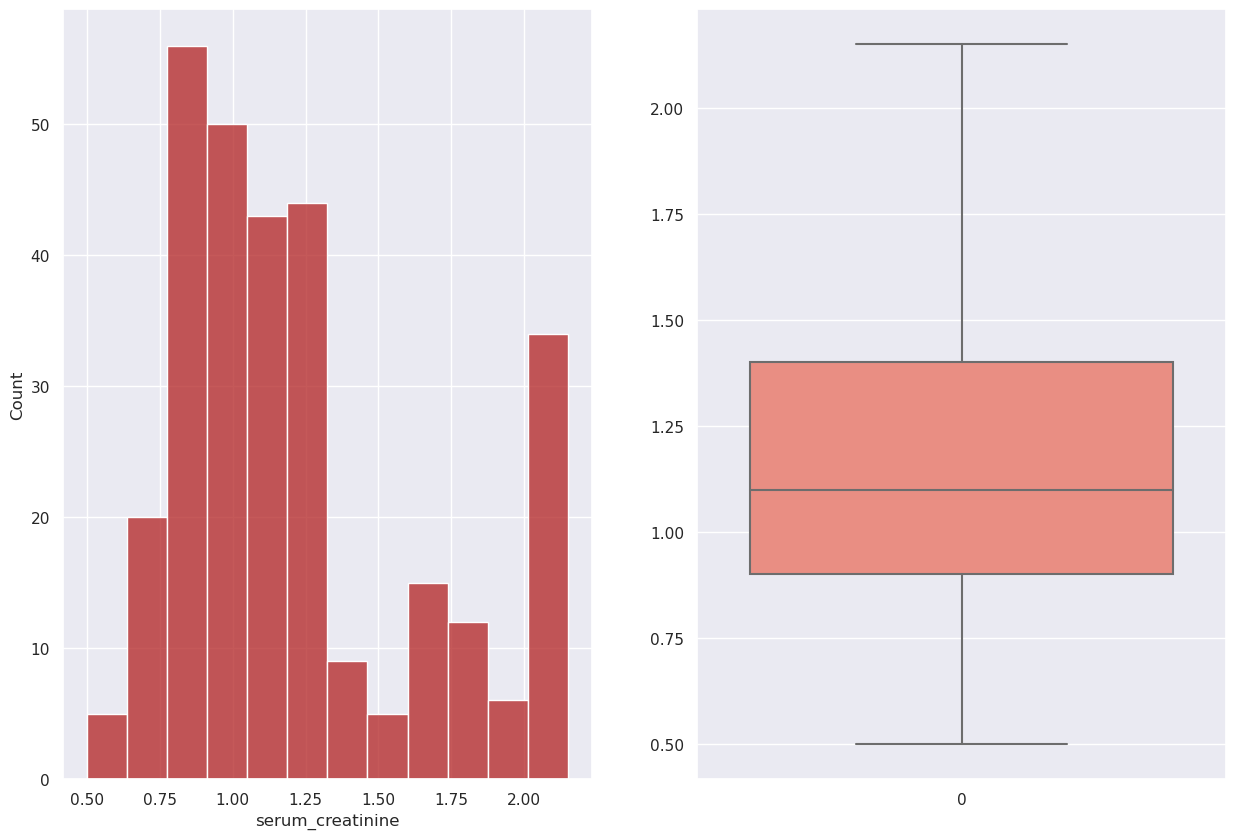

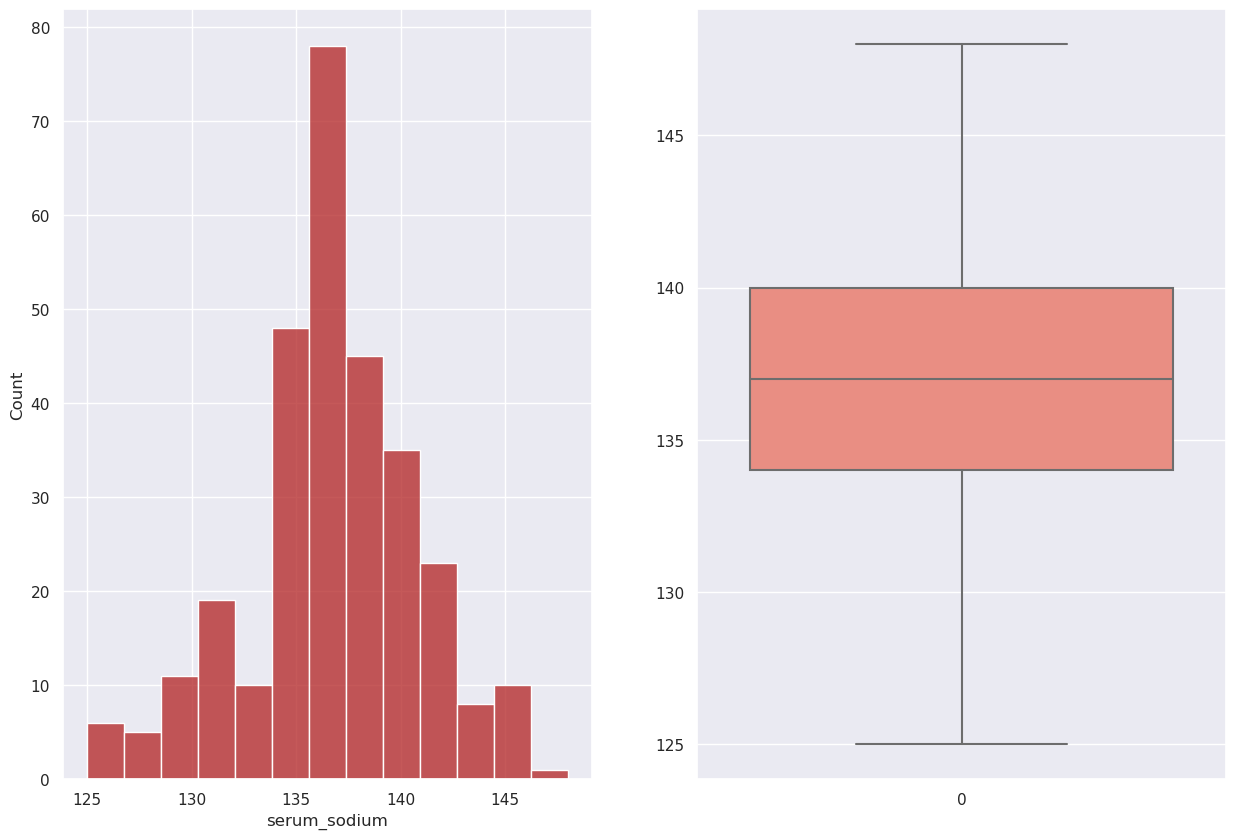

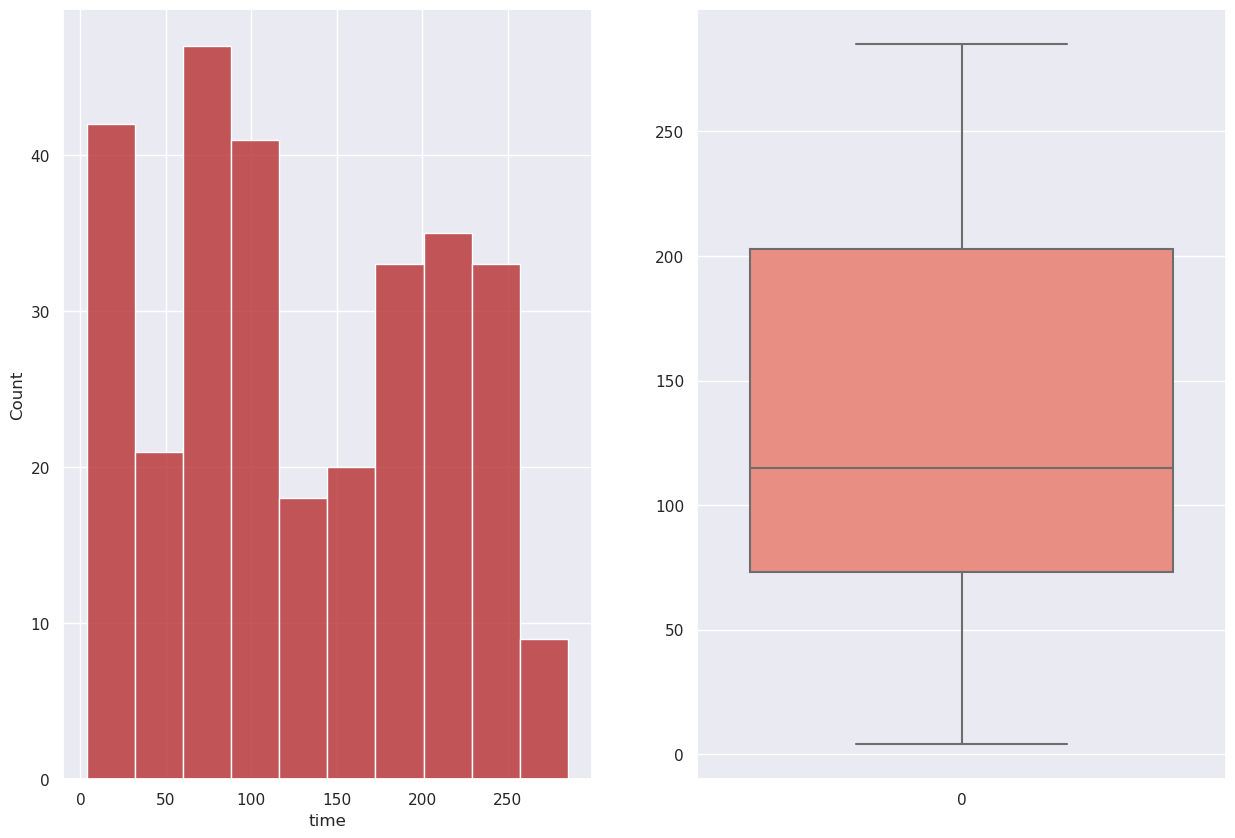

In [49]:
# Melihat distribusi frekuensi dari data kontinu dengan bar chart dan boxplot
for i in df_kontinu:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 10))

    sns.histplot(df[i], color='firebrick', ax=axs[0])
    sns.boxplot(df[i], ax = axs[1], color='salmon', fliersize=1)

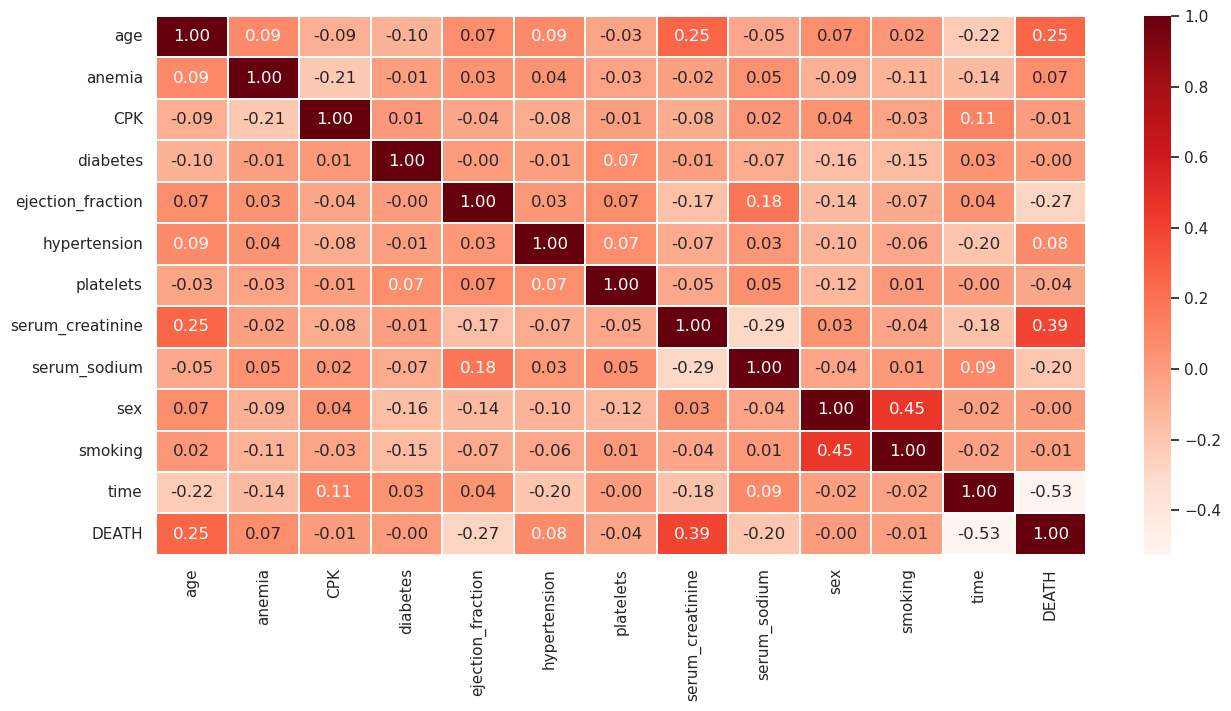

In [50]:
# Melihat korelasi antar fitur
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=0.3, cmap='Reds', ax=ax)
plt.show()

Hubungan antara `DEATH` dengan `age` dan `serum_creatinine` sangat `positif`, sedangkan hubungan antara `DEATH` dengan `time` dan `ejection_fraction` sangat `negatif`. Kemudian, dataset ini dianggap tidak seimbang jika dilihat dari visualisasi data.

# 6. Data Preprocessing

## 6.1 Analisis Korelasi dan Label Encode

In [51]:
df1.nunique()

age                   47
anemia                 2
CPK                  180
diabetes               2
ejection_fraction     16
hypertension           2
platelets            158
serum_creatinine      21
serum_sodium          23
sex                    2
smoking                2
time                 148
DEATH                  2
dtype: int64

In [52]:
df1

,age,anemia,CPK,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


## 6.2 Membuat Data Frame Berisi Feature yang Dipilih Berdasarkan Analisis Korelasi

In [53]:
df_pred = df1
df_pred

,age,anemia,CPK,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


## 6.3 Splitting Data

In [54]:
x = df_pred.drop(columns=['DEATH'])
y = df_pred['DEATH']

Splitting data digunakan untuk membagi dataset menjadi subset yang berbeda, seperti pelatihan (training) dan pengujian (testing). Ini adalah langkah penting dalam pengembangan dan evaluasi model machine learning.

Untuk data heart_failure dilakukan splitting data x dan y, dimana x berisi fitur-fitur yang mempengaruhi kelas target yaitu y. 

In [55]:
# Menampilkan 5 data dari x
x[0:5]

,age,anemia,CPK,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8


In [56]:
# Menampilkan 5 data dari y
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: DEATH, dtype: int64

## 6.4 Scalling Data

In [57]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Kode di atas bertujuan untuk melakukan penskalaan (scaling) data menggunakan StandardScaler pada suatu matriks fitur c (data fitur).

StandardScaler adalah sebuah objek yang digunakan untuk melakukan penskalaan fitur dengan menghilangkan rata-rata dan mengubah varians fitur menjadi 1. Ini adalah salah satu metode umum yang digunakan dalam preprocessing data untuk memastikan bahwa semua fitur memiliki skala yang serupa.

In [58]:
# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Code diatas akan membagi x dan y menjadi empat subset yang berbeda: 
- x_train (subset fitur untuk pelatihan)
- x_test (subset fitur untuk pengujian)
- y_train (subset target untuk pelatihan)
- y_test (subset target untuk pengujian)

Dimana data akan dibagi untuk training sebesar 60% dan 40% untuk testing dengan fungsi test_size=0.3

## 6.5 Splitting Balancing

In [59]:
# Split Data Menggunakan SMOTE untuk mengatasi IMbalanced pada Target
smote = SMOTE()
x_s, y_s = smote.fit_resample(x, y)
xs_train, xs_test, ys_train, ys_test = train_test_split(x_s, y_s, test_size=0.2, random_state=42)

Dengan menggunakan `SMOTE()`, balancing dapat dilakukan untuk meningkatkan jumlah sampel kelas minoritas. Namun, karena SMOTE menciptakan sampel sintetis baru melalui interpolasi linier antara sampel kelas minoritas yang ada dan sampel tetangga, ia berusaha untuk menjaga informasi asli yang terkandung dalam kelas minoritas dan menghindari perubahan yang signifikan.

Agar data testing dan training seimbang, balance dengan `SMOTE()` digunakan pada keduanya.

In [60]:
print('Training dataset           :', len(x_train))
print('Training dataset balancing :', len(xs_train))
print('Testing dataset            :', len(x_test))
print('Testing dataset balancing  :', len(xs_test))

Training dataset           : 209
Training dataset balancing : 324
Testing dataset            : 90
Testing dataset balancing  : 82


Code diatas menampilkan jumlah data training dan testing pada splitting yang imbalanced dan balanced. Dapat dilihat bahwa jumlah training dan testing pada data yang balanced mengalami kenaikan karena `SMOTE()` menambah data sintesis baru kedalam data asli. 

# 7. Pendefinisian Model

## 7.1 Logistic Regression

In [61]:
# Membuat model Logistik Regression
lr_model = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

# Membuat model Logistik Regression SMOTE
lr_model_s = LogisticRegression(solver= 'liblinear', penalty = 'l2', random_state=42)

## 7.2 K-Nearest Neighbors

In [62]:
# Membuat model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=16)

# Membuat model K-Nearest Neighbors SMOTE
knn_model_s = KNeighborsClassifier(n_neighbors=16)

## 7.3 Support Vector Machine

In [63]:
# Membuat model Support Vector Machine
svm_model = svm.SVC(kernel='linear', random_state= 42)

# Membuat model Support Vector Machine SMOTE
svm_model_s = svm.SVC(kernel='linear', random_state= 42)

## 7.4 Naive Bayes

In [64]:
# Membuat model Naive Bayes
nb_model = GaussianNB()

# Membuat model Naive Bayes SMOTE
nb_model_s = GaussianNB()

## 7.5 Decision Tree

In [65]:
# Membuat model Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Membuat model Decision Tree Classifier SMOTE
dtc_model_s = DecisionTreeClassifier(criterion='entropy', max_depth=3)

## 7.6 Random Forest

In [66]:
# Membuat model Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100)

# Membuat model Random Forest Classifier SMOTE
rfc_model_s = RandomForestClassifier(n_estimators=100)

Model diatas didefinisikan sebagai estimators yang akan digunakan pada ensemble model. Estimator adalah model individu yang membentuk bagian dari ensemble. Estimator dapat menjadi model yang sama atau berbeda, tetapi mereka digunakan untuk mempelajari pola dan membuat prediksi terhadap data.

# 8. Pelatihan Model

Pelatihan model adalah proses menggunakan algoritma machine learning untuk mengolah dataset yang telah dibagi menjadi data pelatihan dan mengoptimalkan algoritma untuk menemukan pola dan output tertentu.


## 8.1 Logistic Regression

In [67]:
# Model Training Logistic Regression
lr_model = lr_model.fit(x_train, y_train)

# Model Training Logistic Regression SMOTE
lr_model_s = lr_model_s.fit(xs_train, ys_train)

## 8.2 K-Nearest Neighbors

In [68]:
# Model Training K-Nearest Neighbors
knn_model = knn_model.fit(x_train, y_train)

# Model Training K-Nearest Neighbors SMOTE
knn_model_s = knn_model_s.fit(xs_train, ys_train)

## 8.3 Support Vector Machine

In [69]:
# Model Training Support Vector Machine
svm_model = svm_model.fit(x_train, y_train)

# Model Training Support Vector Machine SMOTE
svm_model_s = svm_model_s.fit(xs_train, ys_train)

## 8.4 Naive Bayes

In [70]:
# Model Training Naive Bayes
nb_model = nb_model.fit(x_train, y_train)

# Model Training Naive Bayes SMOTE
nb_model_s = nb_model_s.fit(xs_train, ys_train)

## 8.5 Decision Tree

In [71]:
# Model Training Decision Tree Classifier
dtc_model = dtc_model.fit(x_train, y_train)

# Model Training Decision Tree Classifier SMOTE
dtc_model_s = dtc_model_s.fit(xs_train, ys_train)

## 8.5 Random Forest

In [72]:
# Model Training Random Forest Classifier
rfc_model = rfc_model.fit(x_train, y_train)

# Model Training Random Forest Classifier SMOTE
rfc_model_s = rfc_model_s.fit(xs_train, ys_train)

# 9. Evaluasi Model

Setelah Pelatihan Model, evaluasi model digunakan untuk menguji akurasi tes data. Evaluasi ini dilakukan menggunakan metode Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes sebagai berikut:

1. Akurasi (Accuracy): metrik yang umum untuk masalah klasifikasi dan digunakan untuk mengukur sejauh mana model benar dalam mengklasifikasikan data. 
2. Melihat akurasi model. 
3. Melihat harga hasil prediksi dan membandingkannya dengan harga aktual. 
4. Membuat visualisasi regresi untuk masing-masing kondisi.


## 9.1 Logistic Regression

### 9.1.1 Tanpa penanganan Imbalanced

In [73]:
y_pred_lr = lr_model.predict(x_test)
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
accuracy_score_lr

0.7777777777777778

In [74]:
print('\nHasil Classification Report Tanpa Penanganan Imbalanced\n')
print(classification_report(y_test,y_pred_lr)) 


Hasil Classification Report Tanpa Penanganan Imbalanced

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        53
           1       0.84      0.57      0.68        37

    accuracy                           0.78        90
   macro avg       0.80      0.75      0.75        90
weighted avg       0.79      0.78      0.77        90



Berdasarkan hasil analisis di atas, model Logistic Regrerssion tanpa penanganan imbalanced memiliki nilai: 
* accuracy: 0.78
* f1 score: 0.68
* recall: 0.57
* precision: 0.84

### 9.1.2 Imbalanced di atasi

In [75]:
y_pred_lr_s = lr_model_s.predict(xs_test)
accuracy_score_lr_s = accuracy_score(ys_test, y_pred_lr_s)
accuracy_score_lr_s

0.8414634146341463

In [76]:
print('\nHasil Classification Report Imbalanced di atasi\n')
print(classification_report(ys_test ,y_pred_lr_s)) 


Hasil Classification Report Imbalanced di atasi

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.83      0.85      0.84        41

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



Berdasarkan hasil analisis di atas, model Logistic Regrerssion dengan imbalanced yang di atasi memiliki nilai: 
* accuracy: 0.84
* f1 score: 0.84
* recall: 0.85
* precision: 0.83

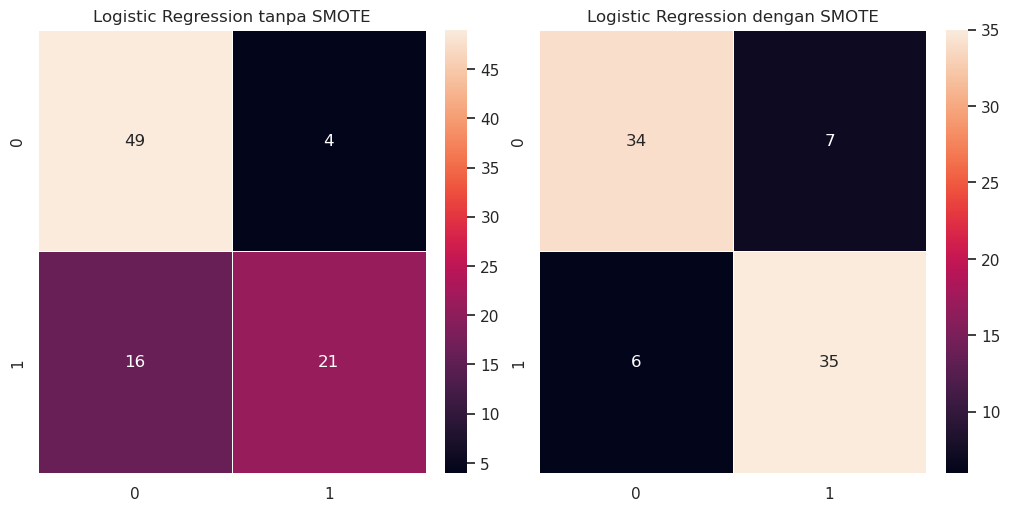

In [77]:
lrcm = confusion_matrix(y_test, y_pred_lr)
lrscm = confusion_matrix(ys_test, y_pred_lr_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(lrcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Logistic Regression tanpa SMOTE')
sns.heatmap(lrscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Logistic Regression dengan SMOTE')
plt.savefig("lrcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari Counfusion Matrix tanpa SMOTE diketahui bahwa True Negatif (TN) sebanyak 21, false negatif (FN) sebanyak 16, false positif (FP) sebanyak 4, dan true positif (TP) sebanyak 49. Sedangkan yang menggunakan SMOTE, True Negatif (TN) sebanyak 35, false negatif (FN) sebanyak 6, false positif (FP) sebanyak 7, dan true positif (TP) sebanyak 34.

## 9.2 K-Nearest Neighbors

### 9.2.1 Tanpa penangan Imbalanced

In [78]:
y_pred_knn = knn_model.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
accuracy_score_knn

0.6777777777777778

In [79]:
print('\nHasil Classification Report Tanpa Penanganan Imbalanced\n')
print(classification_report(y_test,y_pred_knn))


Hasil Classification Report Tanpa Penanganan Imbalanced

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        53
           1       1.00      0.22      0.36        37

    accuracy                           0.68        90
   macro avg       0.82      0.61      0.57        90
weighted avg       0.79      0.68      0.61        90



Berdasarkan hasil analisis di atas, model K-Nearest Neighbors tanpa penanganan imbalanced memiliki nilai: 
* accuracy: 0.68
* f1 score: 0.36
* recall: 0.22
* precision: 1.00

### 9.2.2 Imbalanced di atasi

In [80]:
y_pred_knn_s = knn_model_s.predict(xs_test)
accuracy_score_knn_s = accuracy_score(ys_test, y_pred_knn_s)
accuracy_score_knn_s

0.7804878048780488

In [81]:
print('\nHasil Classification Report Imbalanced di atasi\n')
print(classification_report(ys_test ,y_pred_knn_s)) 


Hasil Classification Report Imbalanced di atasi

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.79      0.76      0.77        41

    accuracy                           0.78        82
   macro avg       0.78      0.78      0.78        82
weighted avg       0.78      0.78      0.78        82



Berdasarkan hasil analisis di atas, model K-Nearest Neighbors dengan imbalanced yang di atasi memiliki nilai: 
* accuracy: 0.78
* f1 score: 0.77
* recall: 0.76
* precision: 0.79

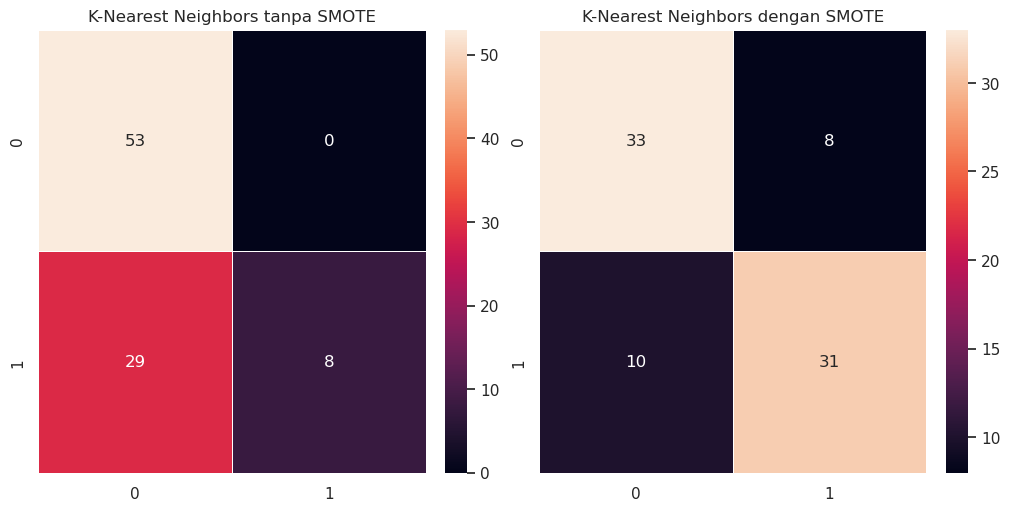

In [82]:
knncm = confusion_matrix(y_test, y_pred_knn)
knnscm = confusion_matrix(ys_test, y_pred_knn_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(knncm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('K-Nearest Neighbors tanpa SMOTE')
sns.heatmap(knnscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('K-Nearest Neighbors dengan SMOTE')
plt.savefig("knncm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari Counfusion Matrix tanpa SMOTE diketahui bahwa True Negatif (TN) sebanyak 8, false negatif (FN) sebanyak 29, false positif (FP) sebanyak 0, dan true positif (TP) sebanyak 53. Sedangkan yang menggunakan SMOTE, True Negatif (TN) sebanyak 31, false negatif (FN) sebanyak 10, false positif (FP) sebanyak 8, dan true positif (TP) sebanyak 33.

## 9.3 Support Vector Machine

### 9.3.1 Tanpa penanganan Imbalaced

In [83]:
y_pred_svm = svm_model.predict(x_test)
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)
accuracy_score_svm

0.7888888888888889

In [84]:
print('\nHasil Classification Report Tanpa Penanganan Imbalanced\n')
print(classification_report(y_test,y_pred_svm))


Hasil Classification Report Tanpa Penanganan Imbalanced

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        53
           1       0.88      0.57      0.69        37

    accuracy                           0.79        90
   macro avg       0.82      0.76      0.76        90
weighted avg       0.81      0.79      0.78        90



Berdasarkan hasil analisis di atas, model Support Vector Machine tanpa penanganan imbalanced memiliki nilai: 
* accuracy: 0.79
* f1 score: 0.69
* recall: 0.57
* precision: 0.88

### 9.3.2 Imbalanced di atasi

In [85]:
y_pred_svm_s = svm_model_s.predict(xs_test)
accuracy_score_svm_s = accuracy_score(ys_test, y_pred_svm_s)
accuracy_score_svm_s

0.8414634146341463

In [86]:
print('\nHasil Classification Report Imbalanced di atasi\n')
print(classification_report(ys_test ,y_pred_svm_s)) 


Hasil Classification Report Imbalanced di atasi

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.83      0.85      0.84        41

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



Berdasarkan hasil analisis di atas, model Support Vector Machine dengan imbalanced yang di atasi memiliki nilai: 
* accuracy: 0.84
* f1 score: 0.84
* recall: 0.85
* precision: 0.83

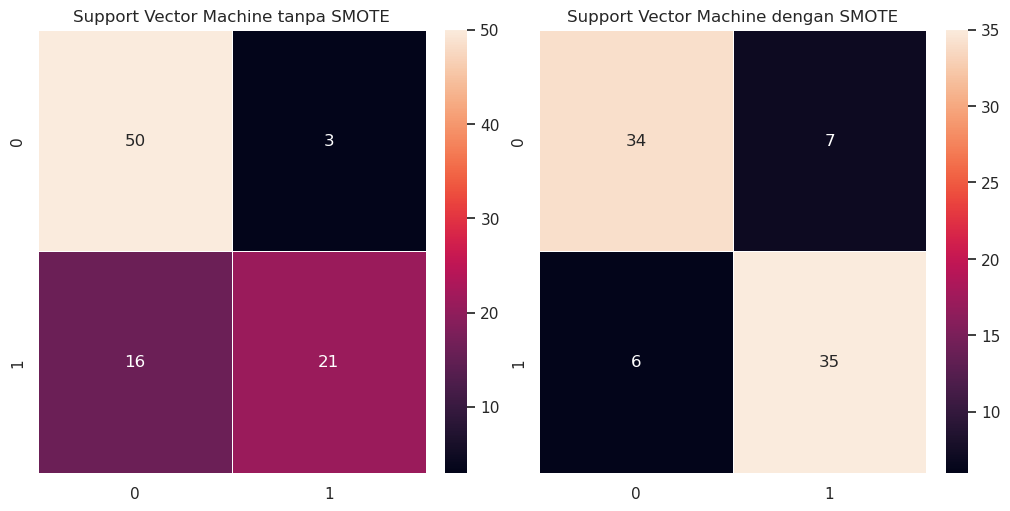

In [87]:
svmcm = confusion_matrix(y_test, y_pred_svm)
svmscm = confusion_matrix(ys_test, y_pred_svm_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(svmcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Support Vector Machine tanpa SMOTE')
sns.heatmap(svmscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Support Vector Machine dengan SMOTE')
plt.savefig("svmcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari Counfusion Matrix tanpa SMOTE diketahui bahwa True Negatif (TN) sebanyak 21, false negatif (FN) sebanyak 16, false positif (FP) sebanyak 3, dan true positif (TP) sebanyak 50. Sedangkan yang menggunakan SMOTE, True Negatif (TN) sebanyak 35, false negatif (FN) sebanyak 6, false positif (FP) sebanyak 7, dan true positif (TP) sebanyak 34.

## 9.4 Naive Bayes

### 9.4.1 Tanpa Penanganan Imbalaced

In [88]:
y_pred_nb = nb_model.predict(x_test)
accuracy_score_nb = accuracy_score(y_test, y_pred_nb)
accuracy_score_nb

0.7444444444444445

In [89]:
print('\nHasil Classification Report Tanpa Penanganan Imbalanced\n')
print(classification_report(y_test,y_pred_nb))


Hasil Classification Report Tanpa Penanganan Imbalanced

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        53
           1       0.75      0.57      0.65        37

    accuracy                           0.74        90
   macro avg       0.75      0.72      0.72        90
weighted avg       0.75      0.74      0.74        90



Berdasarkan hasil analisis di atas, model Naive Bayes tanpa penanganan imbalanced memiliki nilai: 
* accuracy: 0.74
* f1 score: 0.65
* recall: 0.57
* precision: 0.75

### 9.4.2 Imbalanced di atasi

In [90]:
y_pred_nb_s = nb_model_s.predict(xs_test)
accuracy_score_nb_s = accuracy_score(ys_test, y_pred_nb_s)
accuracy_score_nb_s

0.8170731707317073

In [91]:
print('\nHasil Classification Report Imbalanced di atasi\n')
print(classification_report(ys_test ,y_pred_nb_s)) 


Hasil Classification Report Imbalanced di atasi

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.80      0.85      0.82        41

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



Berdasarkan hasil analisis di atas, model Naive Bayes dengan imbalanced yang di atasi memiliki nilai: 
* accuracy: 0.82
* f1 score: 0.82
* recall: 0.85
* precision: 0.80

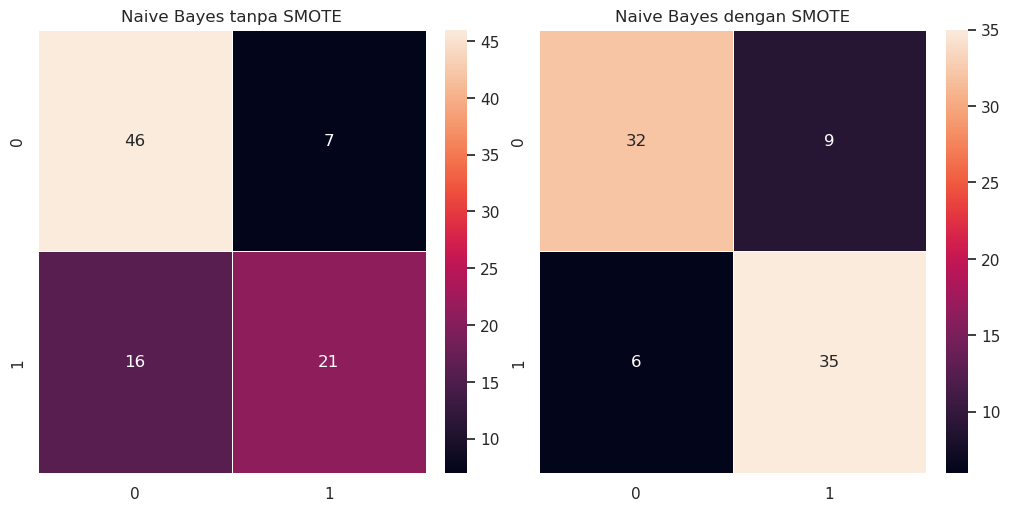

In [92]:
nbcm = confusion_matrix(y_test, y_pred_nb)
nbscm = confusion_matrix(ys_test, y_pred_nb_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(nbcm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Naive Bayes tanpa SMOTE')
sns.heatmap(nbscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Naive Bayes dengan SMOTE')
plt.savefig("nbcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari Counfusion Matrix tanpa SMOTE diketahui bahwa True Negatif (TN) sebanyak 21, false negatif (FN) sebanyak 16, false positif (FP) sebanyak 7, dan true positif (TP) sebanyak 46. Sedangkan yang menggunakan SMOTE, True Negatif (TN) sebanyak 35, false negatif (FN) sebanyak 6, false positif (FP) sebanyak 9, dan true positif (TP) sebanyak 32.

## 9.5 Decision Tree

### 9.5.1 Tanpa penanganan Imbalanced

In [93]:
y_pred_dtc = dtc_model.predict(x_test)
accuracy_score_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_score_dtc

0.7666666666666667

In [94]:
print('\nHasil Classification Report Tanpa Penanganan Imbalanced\n')
print(classification_report(y_test,y_pred_dtc))


Hasil Classification Report Tanpa Penanganan Imbalanced

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90



Berdasarkan hasil analisis di atas, model Decision Tree tanpa penanganan imbalanced memiliki nilai: 
* accuracy: 0.77
* f1 score: 0.68
* recall: 0.59
* precision: 0.79

### 9.5.2 Imbalanced di atasi

In [95]:
y_pred_dtc_s = dtc_model_s.predict(xs_test)
accuracy_score_dtc_s = accuracy_score(ys_test, y_pred_dtc_s)
accuracy_score_dtc_s

0.8292682926829268

In [96]:
print('\nHasil Classification Report Imbalanced di atasi\n')
print(classification_report(ys_test ,y_pred_dtc_s))


Hasil Classification Report Imbalanced di atasi

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.81      0.85      0.83        41

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82



Berdasarkan hasil analisis di atas, model Decision Tree dengan imbalanced yang diatasi memiliki nilai: 
* accuracy: 0.83
* f1 score: 0.83
* recall: 0.85
* precision: 0.81

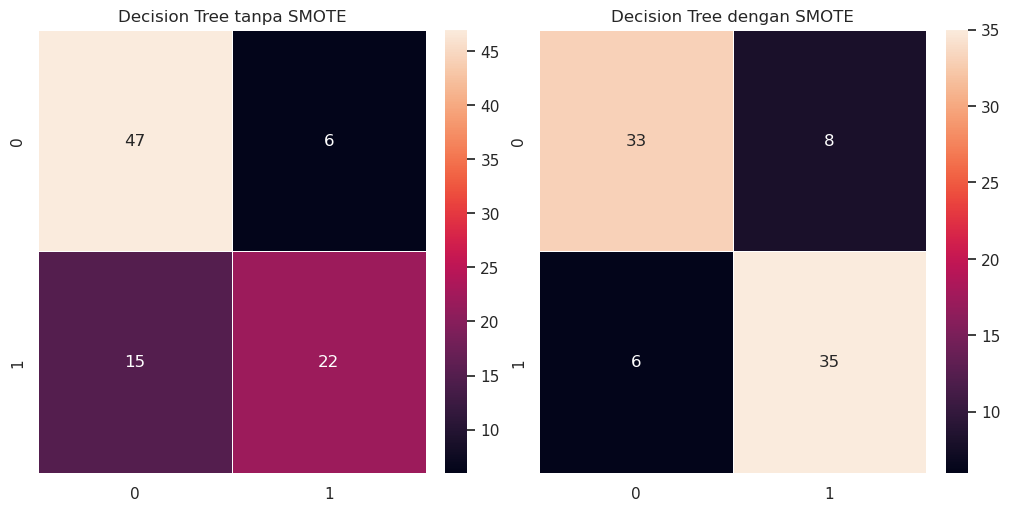

In [97]:
dtccm = confusion_matrix(y_test, y_pred_dtc)
dtcscm = confusion_matrix(ys_test, y_pred_dtc_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(dtccm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Decision Tree tanpa SMOTE')
sns.heatmap(dtcscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Decision Tree dengan SMOTE')
plt.savefig("dtccm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari Counfusion Matrix tanpa SMOTE diketahui bahwa True Negatif (TN) sebanyak 22, false negatif (FN) sebanyak 15, false positif (FP) sebanyak 6, dan true positif (TP) sebanyak 47. Sedangkan yang menggunakan SMOTE, True Negatif (TN) sebanyak 35, false negatif (FN) sebanyak 6, false positif (FP) sebanyak 8, dan true positif (TP) sebanyak 33.

## 9.6 Random Forest

### 9.6.1 Tanpa Penanganan Imbalanced

In [98]:
y_pred_rfc = rfc_model.predict(x_test)
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_score_rfc

0.7666666666666667

In [99]:
print('\nHasil Classification Report Tanpa Penanganan Imbalanced\n')
print(classification_report(y_test,y_pred_rfc))


Hasil Classification Report Tanpa Penanganan Imbalanced

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        53
           1       0.86      0.51      0.64        37

    accuracy                           0.77        90
   macro avg       0.80      0.73      0.74        90
weighted avg       0.79      0.77      0.75        90



Berdasarkan hasil analisis di atas, model Random Forest tanpa penanganan imbalanced memiliki nilai: 
* accuracy: 0.77
* f1 score: 0.66
* recall: 0.51
* precision: 0.86

### 9.6.2 Imbalanced di atasi

In [100]:
y_pred_rfc_s = rfc_model_s.predict(xs_test)
accuracy_score_rfc_s = accuracy_score(ys_test, y_pred_rfc_s)
accuracy_score_rfc_s

0.8902439024390244

In [101]:
print('\nHasil Classification Report Imbalanced di atasi\n')
print(classification_report(ys_test ,y_pred_rfc_s))


Hasil Classification Report Imbalanced di atasi

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.85      0.95      0.90        41

    accuracy                           0.89        82
   macro avg       0.90      0.89      0.89        82
weighted avg       0.90      0.89      0.89        82



Berdasarkan hasil analisis di atas, model Random Forest dengan imbalanced yang diatasi memiliki nilai: 
* accuracy: 0.89
* f1 score: 0.90
* recall: 0.95
* precision: 0.85

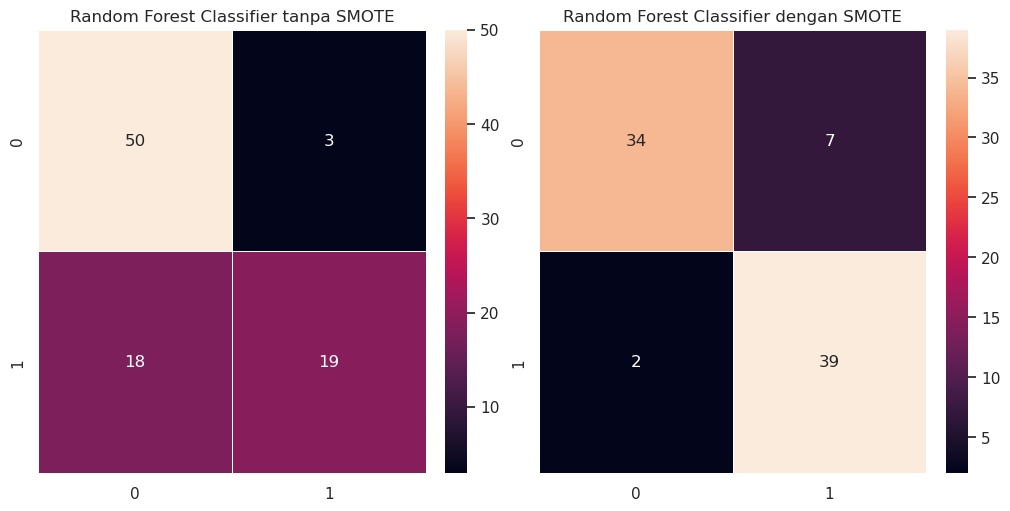

In [102]:
rfccm = confusion_matrix(y_test, y_pred_rfc)
rfcscm = confusion_matrix(ys_test, y_pred_rfc_s)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(rfccm, annot=True, fmt="d", linewidths=.5, ax=ax[0])
ax[0].set_title('Random Forest Classifier tanpa SMOTE')
sns.heatmap(rfcscm, annot=True, fmt="d", linewidths=.5, ax=ax[1])
ax[1].set_title('Random Forest Classifier dengan SMOTE')
plt.savefig("rfccm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari Counfusion Matrix tanpa SMOTE diketahui bahwa True Negatif (TN) sebanyak 19, false negatif (FN) sebanyak 18, false positif (FP) sebanyak 3, dan true positif (TP) sebanyak 50. Sedangkan yang menggunakan SMOTE, True Negatif (TN) sebanyak 39, false negatif (FN) sebanyak 2, false positif (FP) sebanyak 7, dan true positif (TP) sebanyak 34.

# 10. Model Inference

In [103]:
model_inference = {
    'age': [47, 38, 33, 54, 65, 71, 30, 73, 83, 25],
    'anemia': [0, 0, 1, 0, 1, 1, 0, 1, 1, 0],
    'CPK': [945, 207, 318, 718, 192, 65, 101, 815, 451, 59],
    'diabetes': [0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    'ejection_fraciton': [55, 69, 70, 35, 21, 48, 30, 27, 51, 67],
    'hypertension': [0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'platelets': [200000, 354000, 135000, 594000, 431000, 487000, 671000, 295000, 622000, 369000], 
    'serum_creatinine': [1.25, 1.00, 2.94, 3.00, 2.31, 1.30, 1.40, 2.50, 1.10, 1.37],
    'sex': [0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    'smoking': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
    'time': [256, 126, 298, 96, 100, 123, 81, 297, 300, 150],
    'death': [1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
}

dt_trial = pd.DataFrame(model_inference)
dt_trial

,age,anemia,CPK,diabetes,ejection_fraciton,hypertension,platelets,serum_creatinine,sex,smoking,time,death
0,47,0,945,0,55,0,200000,1.25,0,0,256,1
1,38,0,207,1,69,0,354000,1.00,1,1,126,0
2,33,1,318,1,70,1,135000,2.94,1,1,298,1
3,54,0,718,0,35,1,594000,3.00,0,0,96,0
4,65,1,192,0,21,0,431000,2.31,0,1,100,0
5,71,1,65,1,48,1,487000,1.30,1,0,123,0
6,30,0,101,0,30,0,671000,1.40,0,0,81,1
7,73,1,815,1,27,1,295000,2.50,1,1,297,1
8,83,1,451,1,51,1,622000,1.10,1,1,300,1
9,25,0,59,0,67,0,369000,1.37,0,0,150,0


In [104]:
dt_trial = scaler.fit_transform(dt_trial)

In [105]:
pred_lr_minf = lr_model.predict(dt_trial)
pred_lr_s_minf = lr_model_s.predict(dt_trial)
pred_knn_minf = knn_model.predict(dt_trial)
pred_knn_s_minf = knn_model_s.predict(dt_trial)
pred_svm_minf = svm_model.predict(dt_trial)
pred_svm_s_minf = svm_model_s.predict(dt_trial)
pred_dtc_minf = dtc_model.predict(dt_trial)
pred_dtc_s_minf = dtc_model_s.predict(dt_trial)
pred_rfc_minf = rfc_model.predict(dt_trial)
pred_rfc_s_minf = rfc_model_s.predict(dt_trial)
pred_nb_minf = nb_model.predict(dt_trial)
pred_nb_s_minf = nb_model_s.predict(dt_trial)

print("Model Logistic Regression = ", pred_lr_minf)
print("Model Logistic Regression SMOTE = ", pred_lr_s_minf)
print("Model K-Nearest Neighbors = ", pred_knn_minf)
print("Model K-Nearest Neighbors SMOTE = ", pred_knn_s_minf)
print("Model Support Virtual Machine = ", pred_svm_minf)
print("Model Support Virtual Machine SMOTE = ", pred_svm_s_minf)
print("Model Decision Tree = ", pred_dtc_minf)
print("Model Decision Tree SMOTE = ", pred_dtc_s_minf)
print("Model Random Forest = ", pred_rfc_minf)
print("Model Random Forest SMOTE = ", pred_rfc_s_minf)
print("Model Naive Bayes = ", pred_nb_minf)
print("Model Naive Bayes SMOTE = ", pred_nb_s_minf)

Model Logistic Regression =  [0 0 0 1 1 0 0 0 0 0]
Model Logistic Regression SMOTE =  [0 0 0 1 1 1 0 0 0 0]
Model K-Nearest Neighbors =  [0 0 0 0 1 0 0 0 0 0]
Model K-Nearest Neighbors SMOTE =  [0 0 0 1 1 1 0 0 0 0]
Model Support Virtual Machine =  [0 0 0 1 1 1 0 0 0 0]
Model Support Virtual Machine SMOTE =  [0 0 0 1 1 1 0 0 0 0]
Model Decision Tree =  [0 1 1 1 1 0 0 0 0 0]
Model Decision Tree SMOTE =  [0 1 1 1 1 1 0 1 0 1]
Model Random Forest =  [0 0 0 1 1 1 0 0 0 0]
Model Random Forest SMOTE =  [0 1 0 1 1 1 0 0 0 0]
Model Naive Bayes =  [0 0 0 1 1 0 0 0 0 0]
Model Naive Bayes SMOTE =  [0 0 0 1 1 1 0 0 0 0]


# 11. Kesimpulan

Untuk memprediksi keselamatan pasien dari penyakit jantung, final project ini menggunakan pemodelan yang menggunakan `Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes`. Berdasarkan data target (DEATH), ternyata terjadi ketidakseimbangan data, yang juga dikenal sebagai imbalanced data. Oleh karena itu, percobaan model dilakukan dengan data yang mengatasi masalah imbalancednya dan dengan data yang tidak.
***
* Model yang di-training tanpa SMOTE: 
    * Model yang memiliki accuracy tertinggi adalah Support Vector Machine yaitu sebesar 0.79
    * Model yang memiliki precision tertinggi adalah K-Nearest Neighbors yaitu sebesar 1.00
    * Model yang memiliki recall tertinggi adalah Decision Tree yaitu sebesar 0.59
    * Model yang memiliki f1-score tertinggi adalah Support Vector Machine yaitu sebesar 0.69
* Model yang di-training dengan SMOTE:
    * Model yang memiliki accuracy tertinggi adalah Random Forest yaitu sebesar 0.89
    * Model yang memiliki precision tertinggi adalah Random Forest yaitu sebesar 0.85
    * Model yang memiliki recall tertinggi adalah Random Forest yaitu sebesar 0.95
    * Model yang memiliki f1-score tertinggi adalah Random Forest yaitu sebesar 0.89
***
Dari ke-6 model yang dibuat, model `Random Forest Classifier` ternyata yang terbaik untuk menangani masalah data yang tidak seimbang (keseimbangan data). Ini karena, berdasarkan nilai accuracy, akan lebih efektif jika data seimbang.